<font color='#00A0B8'> ===================================================================================================================
</font>
**<h1 align="center"><font color='#2E82A8' font-family='Helvetica' ><b>   Automatic Ticket Assignment System</b></font></h1>**
<font color='#00A0B8'> ====================================================================================================================
</font>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


#  <h3><font color='#00A0B8' font-family='Helvetica'>**Data Loading...**</font></h3>

In [2]:
# colors to format output
colors = {'PURPLE' : '\033[95m','CYAN' : '\033[96m','DARKCYAN' : '\033[36m','BLUE' : '\033[94m','GREEN' : '\033[92m',
     'YELLOW' : '\033[93m','RED' : '\033[91m','BOLD' : '\033[1m','UNDERLINE' : '\033[4m','END' : '\033[0m'}

In [3]:
from sklearn import preprocessing
import os 
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

class IncidentDataloader(object):
  def __init__(self, project_path):
    self.project_path = project_path
    
  def loadIncidents(self):
    ## Read the data from EXCEL
    return pd.read_excel(self.project_path)

  def getUniqueAssignmentGroups(self, df):
    return df['Assignment group'].unique()

  def getNullRows(self, df):
    return df[df.isnull().any(axis=1)]

  def getNullRowCount(self, df):
    return df.isnull().sum().sum()

  def processNullValues(self, df):
    return df.replace(np.nan, '', regex=True)

  def getDuplicateRows(self, df):
    return df[df.duplicated(keep="last")]

  def removeDuplicateRows(self, df):
      return df.drop_duplicates(keep="last")

  def combineDescription(self, df):
    return pd.DataFrame({"Short description":df['Short description'],
                         "Description":df['Description'],
                        "New_Description":np.where(df['Short description']==df['Description'],
                                                df['Short description'],
                                                df['Short description'] + " " + df['Description']),
                         "Caller": df["Caller"],
                         "Assignment group": df["Assignment group"]},
                         columns=["Short description","Description","New_Description","Caller","Assignment group"])
    
  def encodeAssignmentGroup(self, df):
    label_encoder = preprocessing.LabelEncoder() 
    df['Assignment group'] = label_encoder.fit_transform(df['Assignment group'])
    return df

  def applyPOSTagging(self, ds):
    ds['Description_pos_tagged'] = ds['New_Description'].apply(lambda x: self._word_pos_tagger(nltk.word_tokenize(x)))
    return ds
    
  def _word_pos_tagger(self, description_text):   
    pos_tagged_text = nltk.pos_tag(description_text)
    return pos_tagged_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
project_path = '/content/drive/My Drive/Colab Notebooks/Capstone/'
inc_dataLoader = IncidentDataloader(project_path+ "input_data.xlsx")
incidentsData = inc_dataLoader.loadIncidents()

In [5]:
incidentsData.shape

(8500, 4)

In [6]:
inc_dataLoader.getUniqueAssignmentGroups(incidentsData)

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [7]:
#Check null values in data
inc_dataLoader.getNullRows(incidentsData)

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [8]:
print("Number of Null values in dataset: ",inc_dataLoader.getNullRowCount(incidentsData))

Number of Null values in dataset:  9


In [9]:
incidentsData.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [10]:
incidentsData = inc_dataLoader.processNullValues(incidentsData)

In [11]:
inc_dataLoader.getDuplicateRows(incidentsData)

Short description  ... Assignment group
39                           call for ecwtrjnq jpecxuty  ...            GRP_0
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
126                                    blank call //gso  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
230                                         blank call   ...            GRP_0
...                                                 ...  ...              ...
7215                               account locked in ad  ...            GRP_0
7772                           blank call // loud noise  ...            GRP_0
7847               issue on pricing in distributor_tool  ...           GRP_21
7905                           unable to launch outlook  ...            GRP_0
8092  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17

[83 rows x 4 columns]

In [12]:
incidentsData = inc_dataLoader.removeDuplicateRows(incidentsData)

In [13]:
incidentsData = inc_dataLoader.combineDescription(incidentsData)

In [14]:
incidentsData.head(15)

Short description  ... Assignment group
0                                         login issue  ...            GRP_0
1                                             outlook  ...            GRP_0
2                                  cant log in to vpn  ...            GRP_0
3                       unable to access hr_tool page  ...            GRP_0
4                                        skype error   ...            GRP_0
5      unable to log in to engineering tool and skype  ...            GRP_0
6   event: critical:HostName_221.company.com the v...  ...            GRP_1
7   ticket_no1550391- employment status - new non-...  ...            GRP_0
8                unable to disable add ins on outlook  ...            GRP_0
9                     ticket update on inplant_874773  ...            GRP_0
10  engineering tool says not connected and unable...  ...            GRP_0
11            hr_tool site not loading page correctly  ...            GRP_0
12  unable to login to hr_tool to sgxqsuojr xwbeso...  ...            GRP_0
13                   user wants to reset the password  ...            GRP_0
14                           unable to open payslips   ...            GRP_0

[15 rows x 5 columns]

In [15]:
incidentsData = inc_dataLoader.applyPOSTagging(incidentsData)

#  <h3><font color='#00A0B8' font-family='Helvetica'>**EDA**</font></h3>

In [ ]:
# incidentsData.to_csv(project_path + 'input-processed-data.csv', header=True, index=False)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sns
sns.set_style("whitegrid")
flatui = ['#2E82A8','#00A0B8','#00BDB4','#53D69F','#A5EB84','#F9F871']

In [ ]:
incidentsData.shape

(8417, 6)

In [ ]:
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8417 non-null   object
 1   Description             8417 non-null   object
 2   New_Description         8417 non-null   object
 3   Caller                  8417 non-null   object
 4   Assignment group        8417 non-null   object
 5   Description_pos_tagged  8417 non-null   object
dtypes: object(6)
memory usage: 460.3+ KB


In [ ]:
incidentsData['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

## <h5><font color='#00A0B8' font-family='Helvetica'>To analyse top 15 groups based on no of tickets assigned</font></h5>

In [ ]:
incidentsData1 = incidentsData.drop('Caller',axis=1)
incidentsData1 = incidentsData['Assignment group'].value_counts().reset_index()
incidentsData1['percentage'] = (incidentsData1['Assignment group']/incidentsData1['Assignment group'].sum())*100
incidentsData1.head(15)

index  Assignment group  percentage
0    GRP_0              3934   46.738743
1    GRP_8               645    7.663063
2   GRP_24               285    3.386005
3   GRP_12               257    3.053344
4    GRP_9               252    2.993941
5    GRP_2               241    2.863253
6   GRP_19               215    2.554354
7    GRP_3               200    2.376144
8    GRP_6               183    2.174171
9   GRP_13               145    1.722704
10  GRP_10               140    1.663300
11   GRP_5               128    1.520732
12  GRP_14               118    1.401925
13  GRP_25               116    1.378163
14  GRP_33               107    1.271237

## <h5><font color='#00A0B8' font-family='Helvetica'>To analyse bottom 15 groups based on no of tickets assigned</font></h5>

In [ ]:
incidentsData1.tail(15)

index  Assignment group  percentage
59  GRP_63                 3    0.035642
60  GRP_68                 3    0.035642
61  GRP_38                 3    0.035642
62  GRP_56                 3    0.035642
63  GRP_69                 2    0.023761
64  GRP_72                 2    0.023761
65  GRP_57                 2    0.023761
66  GRP_71                 2    0.023761
67  GRP_54                 2    0.023761
68  GRP_35                 1    0.011881
69  GRP_73                 1    0.011881
70  GRP_70                 1    0.011881
71  GRP_64                 1    0.011881
72  GRP_61                 1    0.011881
73  GRP_67                 1    0.011881

<h5><font color='#00A0B8' font-family='Helvetica'>To check the tickets distribution between the groups</font></h5>

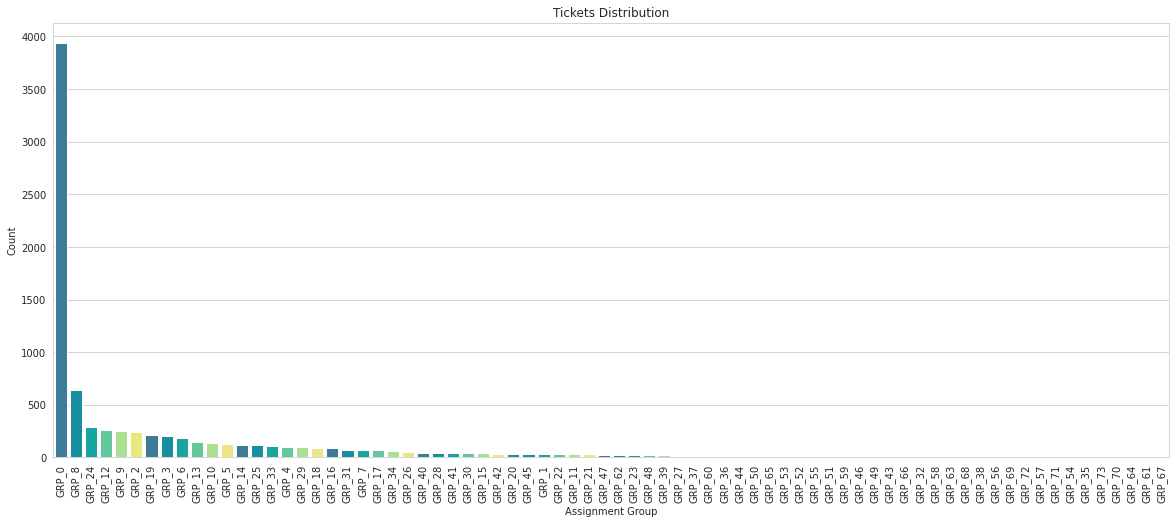

In [ ]:
plt.subplots(figsize = (20,8))

sns.countplot(x='Assignment group', data=incidentsData,order = incidentsData['Assignment group'].value_counts().index, palette = sns.color_palette(flatui))
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>Groups having tickets more than 20</font></h5>

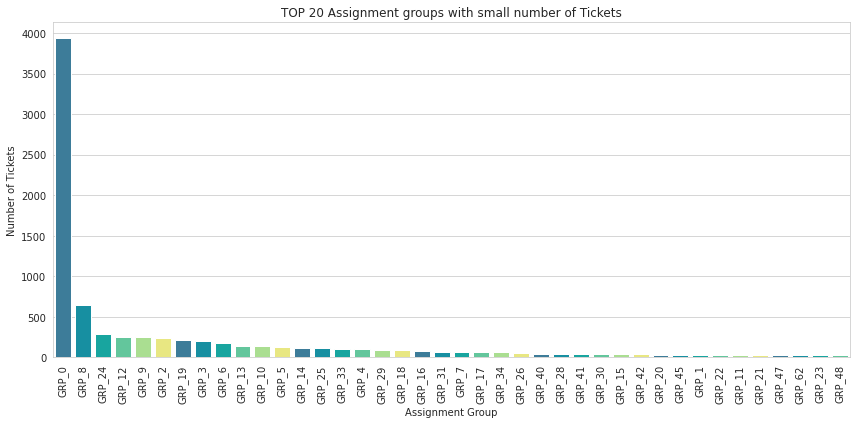

In [ ]:
incidentsData2 = incidentsData1.drop('percentage',axis=1)
incidentsData3= incidentsData2.loc[incidentsData2['Assignment group'] > 20 ]

plt.figure(figsize=(12,6))
bars = sns.barplot(x=incidentsData3['index'],y=incidentsData3['Assignment group'], palette = sns.color_palette(flatui))
plt.title('TOP 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>Groups that are having tickets less than 20</font></h5>

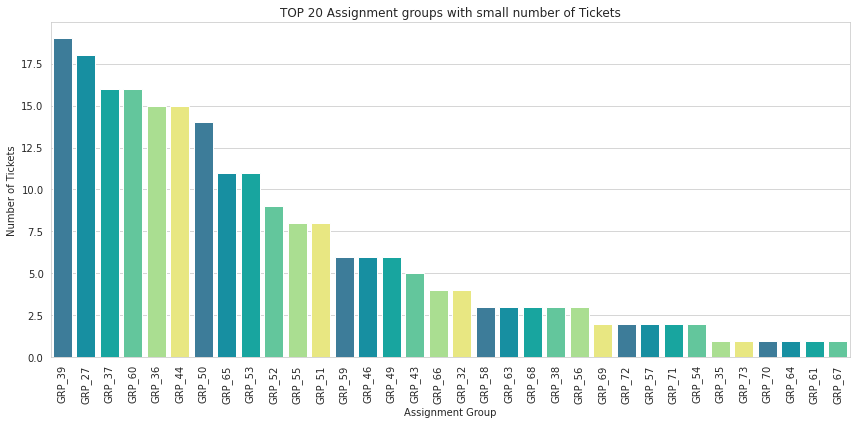

In [ ]:
incidentsData3= incidentsData2.loc[incidentsData2['Assignment group'] < 20 ]

plt.figure(figsize=(12,6))
bars = sns.barplot(x=incidentsData3['index'], y=incidentsData3['Assignment group'],palette = sns.color_palette(flatui))
plt.title('TOP 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>Visualizing tickets assigment to the groups based on bins</font></h5>

In [ ]:
incidentsData_ag = pd.DataFrame(incidentsData['Assignment group'].value_counts())
incidentsData_ag['percentage'] = (incidentsData_ag['Assignment group']/incidentsData_ag['Assignment group'].sum())*100

incidentsData_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_10_ticket = {'Description':'1-10 ticket','Ticket Count':len(incidentsData_ag[incidentsData_ag['Assignment group'] < 11])}
_11_50_ticket = {'Description':'11-50 ticket',
              'Ticket Count':len(incidentsData_ag[(incidentsData_ag['Assignment group'] > 10)& (incidentsData_ag['Assignment group'] < 51) ])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(incidentsData_ag[(incidentsData_ag['Assignment group'] > 50)& (incidentsData_ag['Assignment group'] < 101) ])}
_101_250_ticket = {'Description':' 101-250 ticket',
              'Ticket Count':len(incidentsData_ag[(incidentsData_ag['Assignment group'] > 100)& (incidentsData_ag['Assignment group'] < 251)])}
_251_500_ticket = {'Description':' 251-500 ticket',
              'Ticket Count':len(incidentsData_ag[(incidentsData_ag['Assignment group'] > 250)& (incidentsData_ag['Assignment group'] < 501)])}
_501_above_ticket = {'Description':' >500 ticket',
              'Ticket Count':len(incidentsData_ag[(incidentsData_ag['Assignment group'] > 500)])}

#append row to the dataframe
incidentsData_bins = incidentsData_bins.append([_1_10_ticket,_11_50_ticket,_51_100_ticket,_101_250_ticket,_251_500_ticket,_501_above_ticket], ignore_index=True)
incidentsData_bins

Description Ticket Count
0      1-10 ticket           25
1     11-50 ticket           25
2    51-100 ticket            9
3   101-250 ticket           10
4   251-500 ticket            3
5      >500 ticket            2

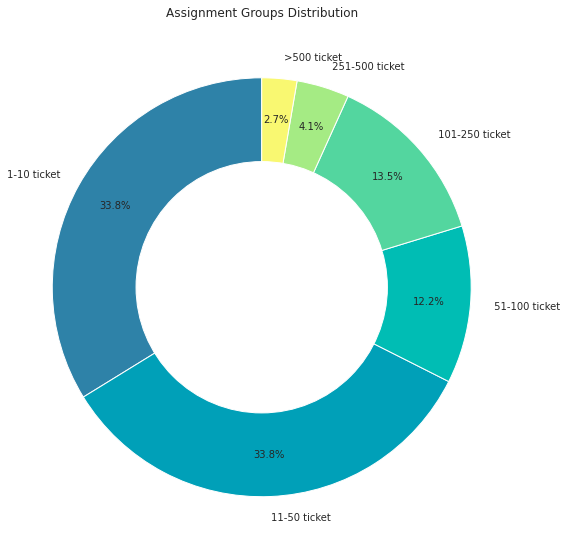

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(incidentsData_bins['Ticket Count'],labels=incidentsData_bins['Description'],autopct='%1.1f%%', startangle=90,  colors=flatui, pctdistance=0.80,);

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Assignment Groups Distribution')

plt.axis('equal');
plt.tight_layout()
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>No of characters in the short descrption</font></h5>

<Figure size 432x648 with 0 Axes>

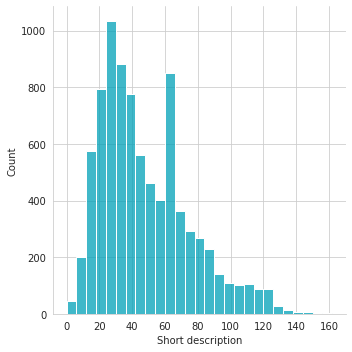

In [ ]:
fig = plt.figure(figsize=(6,9))
text_len=incidentsData['Short description'].str.len()
sns.displot(text_len.dropna(),color='#00A0B8',binwidth=6)
fig.suptitle('Characters in short description')
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>No of words in short description</font></h5>

<Figure size 432x648 with 0 Axes>

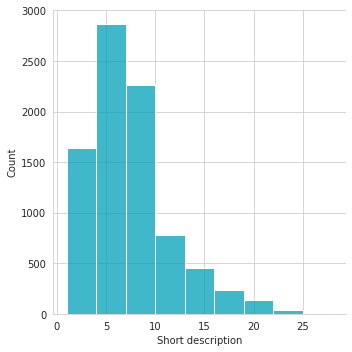

In [ ]:
fig = plt.figure(figsize=(6,9))
text_len=incidentsData['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
sns.displot(text_len.dropna(),color='#00A0B8',binwidth=3)
fig.suptitle('Words in short description')
plt.show()

<Figure size 432x648 with 0 Axes>

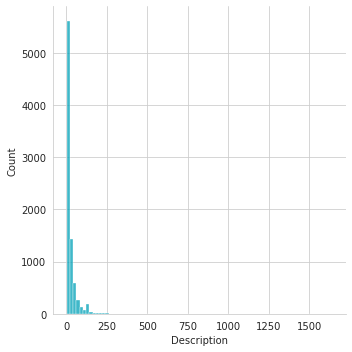

In [ ]:
fig = plt.figure(figsize=(6,9))
text_len=incidentsData['Description'].str.split().map(lambda x: len(str(x).split(" ")))
sns.displot(text_len.dropna(),color='#00A0B8',binwidth=20)
fig.suptitle('Words in description')
plt.show()

In [ ]:
# import matplotlib.colors as mcolors
# def hex_to_rgb(value): 
#     value = value.strip("#") # removes hash symbol if present
#     lv = len(value)
#     return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


# def rgb_to_dec(value):   
#     return [v/256 for v in value]

# def get_continuous_cmap(hex_list, float_list=None):
#     rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
#     if float_list:
#         pass
#     else:
#         float_list = list(np.linspace(0,1,len(rgb_list)))
        
#     cdict = dict()
#     for num, col in enumerate(['red', 'green', 'blue']):
#         col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
#         cdict[col] = col_list
#     cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
#     return cmp

# custom_ramp = get_continuous_cmap(flatui)

In [ ]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)
    
    for val in column: 
         
        val = str(val) 
        
        tokens = val.split() 
         
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  #colormap=custom_ramp,
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

## <h5><font color='#00A0B8' font-family='Helvetica'>Wordcloud of frequently used words in Description</font></h5>

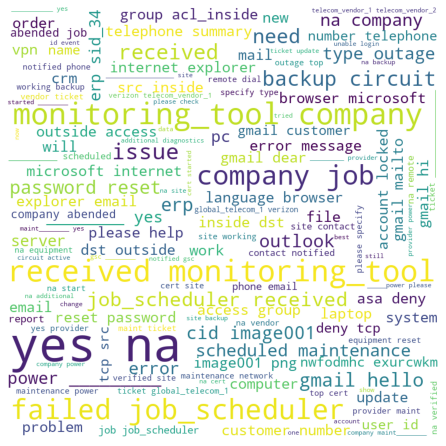

In [ ]:
wordcloud = f_word_cloud(incidentsData['Description'])                       
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>Wordcloud of frequently used words in Short Description</font></h5>

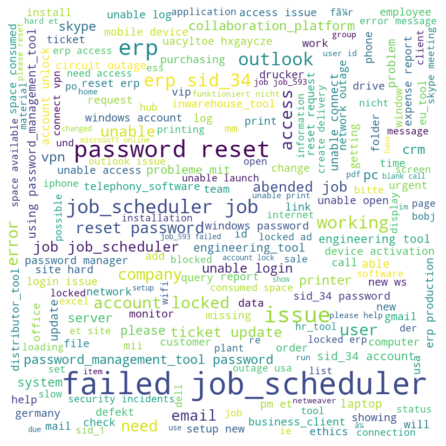

In [ ]:
wordcloud = f_word_cloud(incidentsData['Short description'])         
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

  
plt.show()

## <h5><font color='#00A0B8' font-family='Helvetica'>Wordcloud of frequently used words in Description for different Groups</font></h5>

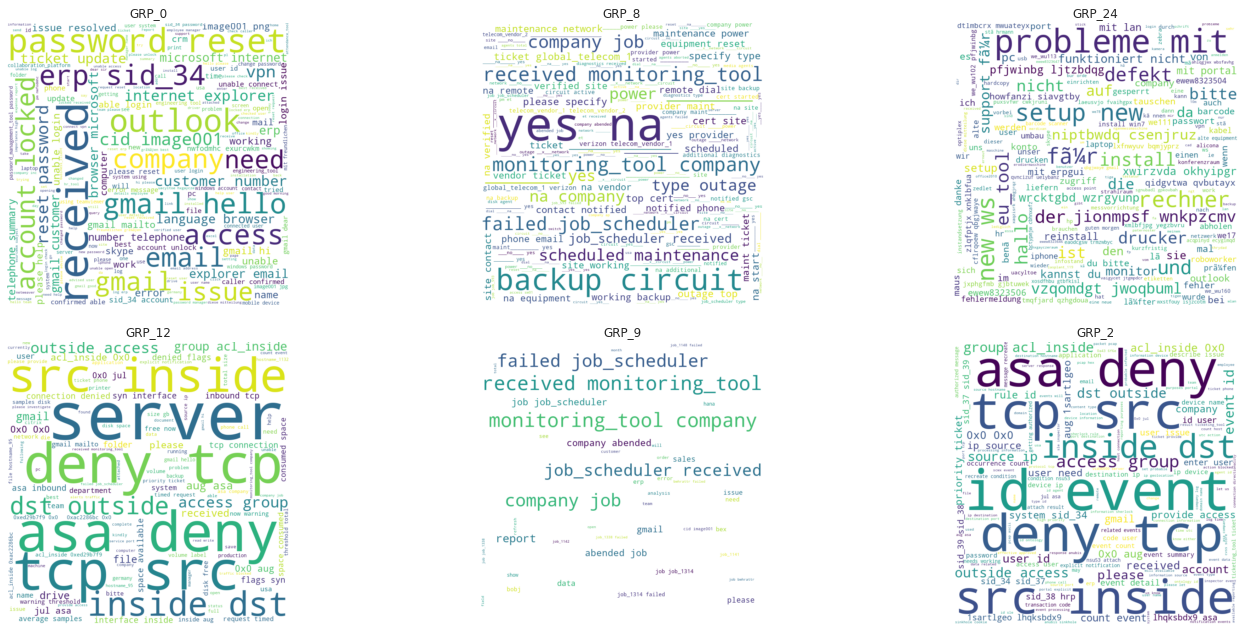

In [ ]:
groups = ['GRP_0', 'GRP_8','GRP_24','GRP_12','GRP_9','GRP_2']
fig = plt.figure(figsize = (20, 18), facecolor = None)
i = 0
for group in groups:  
  plt.subplot(4,3,i+1)
  wordcloud = f_word_cloud(incidentsData[incidentsData['Assignment group']==group].Description)
  # plot the WordCloud image                        
   
  plt.imshow(wordcloud,interpolation="bilinear") 
  plt.axis("off") 
  plt.tight_layout(pad = 2)
  plt.title(group)    
  i = i + 1

plt.show()

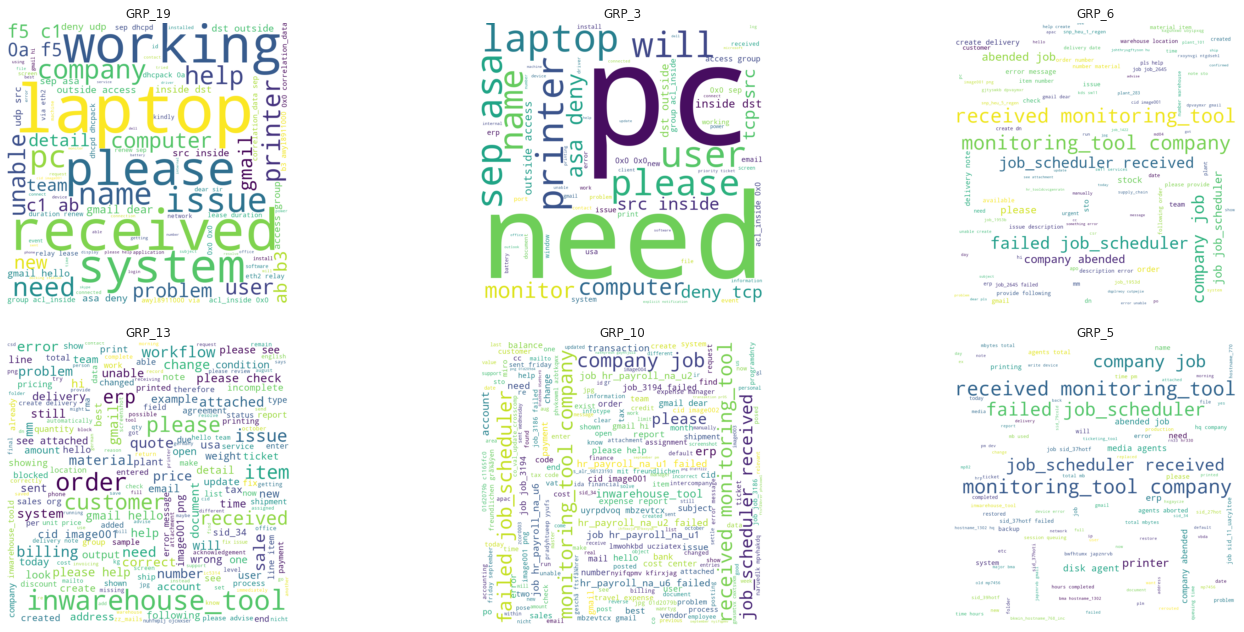

In [ ]:
groups = ['GRP_19','GRP_3','GRP_6','GRP_13','GRP_10','GRP_5']
fig = plt.figure(figsize = (20, 18), facecolor = None)
i = 0
for group in groups:  
  plt.subplot(4,3,i+1)
  wordcloud = f_word_cloud(incidentsData[incidentsData['Assignment group']==group].Description)
  # plot the WordCloud image                        
   
  plt.imshow(wordcloud,interpolation="bilinear") 
  plt.axis("off") 
  plt.tight_layout(pad = 2)
  plt.title(group)    
  i = i + 1

plt.show()

#  <h3><font color='#00A0B8' font-family='Helvetica'>**Topic Modeling**</font></h3>

Represent a documents with the topics it refers to; far
simpler and more intuitive than representing the
document with the words it contains<br/>


In [ ]:
X = incidentsData['New_Description']

## <h4><font color='#00A0B8' font-family='Helvetica'>1. Latent Semantic Analysis (LSA)</font></h4>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)


transformed_vector = vectorizer.fit_transform(X)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

Y = svd_model.fit_transform(transformed_vector)
print('LSA shape:', Y.shape)

LSA shape: (8417, 20)


In [ ]:
explained_variance = svd_model.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 27%


In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ",end="")
    for t in sorted_terms:
        print(t[0],end=" ")
    print(" ")

Topic 0: 00 job job_scheduler failed 2016 monitoring_tool 09 com company received  
Topic 1: password reset erp account sid_34 locked user gmail windows password_management_tool  
Topic 2: account locked erp sid_34 unlock unable login issue ad user  
Topic 3: account locked reset sid_34 password unlock 00 windows job_scheduler job  
Topic 4: update ticket yes na account locked reset password circuit site  
Topic 5: yes na site circuit backup power outage _________ cert notified  
Topic 6: unable login outlook connect skype 00 sid_34 failed open launch  
Topic 7: erp sid_34 unlock production error slow log sid_1 printer logon  
Topic 8: outlook crm erp open working sid_34 launch ms emails responding  
Topic 9: user issue login outlook able id resolved confirmed crm caller  
Topic 10: abended 16 08 job job_scheduler login monitoring_tool company outlook 27  
Topic 11: mit probleme login nicht cid skype best bitte gmail image001  
Topic 12: vpn access probleme mit connect user working nee

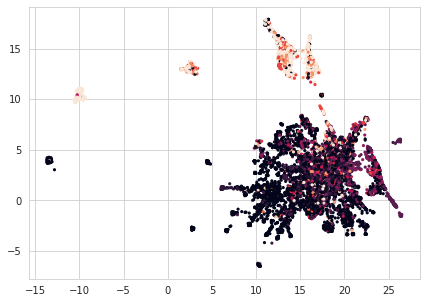

In [ ]:
import umap

X_topics = svd_model.fit_transform(transformed_vector)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(15,8))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = incidentsData['Assignment group'],
s = 10, # size
edgecolor='none'
)
plt.show()

**LSA advantages:**

LSA is fast and easy to implement and provide better results than a plain vector space model.

**LSA disadvantages:** 
1. LSA is a linear model, it might not do well on datasets with non-linear dependencies. 
2. It assumes a Gaussian distribution of the terms in the documents, which may not be true for all the problems.
3. LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

## <h4><font color='#00A0B8' font-family='Helvetica'>2. Latent Dirichlet Allocation (LDA)</font></h4>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(2, 2))

transformed_vector = count_vectorizer.fit_transform(X)

In [ ]:
transformed_vector.shape

(8417, 97198)

In [ ]:
feature_names = count_vectorizer.get_feature_names()

In [ ]:
len(feature_names)

97198

In [ ]:
feature_names[1000:1005]

['01d22a14 9ba833d0',
 '01d22a3d f7f2ecb0',
 '01d22a56 4f7ef4c0',
 '01d22ab4 97030051',
 '01d22ae8 0c3cb4d0']

In [ ]:
NUM_TOPICS = 20

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=20)

lda = lda_model.fit_transform(transformed_vector)

In [ ]:
lda.shape

In [ ]:
lda_model.components_.shape

(20, 97198)

In [ ]:
def print_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(lda_model.components_):

        if topic_id == identifier:
            print("Topic %d:" % (topic_id))

            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            print(" ".join(top_feature_names))

In [ ]:
for i in range(20):
    print_topic(i, top_words=3)

Topic 0:
yes no no na backup circuit
Topic 1:
ticket update update on gmail com
Topic 2:
gmail com unable to received from
Topic 3:
in job_scheduler failed in job_scheduler at
Topic 4:
ticket and to the in the
Topic 5:
gmail com received from unable to
Topic 6:
unable to gmail com login to
Topic 7:
password reset erp sid_34 account locked
Topic 8:
is not not working in the
Topic 9:
79 63 63 203 18 79
Topic 10:
job in abended job com abended
Topic 11:
gmail com is now free on
Topic 12:
80 216 96 80 54 96
Topic 13:
gmail com received from 00 00
Topic 14:
lock out is not account lock
Topic 15:
the user to the login issue
Topic 16:
gmail com received from access to
Topic 17:
gmail com received from of the
Topic 18:
gmail com unable to received from
Topic 19:
outlook not disk agents media agents


In [ ]:
topics = []
NUM_SAMPLES = 8417
for i in range(NUM_SAMPLES):
    topics.append(lda[i].argmax())

In [ ]:
incidentsData['topic'] = topics

incidentsData.head()

Short description  ... topic
0                    login issue  ...    15
1                        outlook  ...     1
2             cant log in to vpn  ...     6
3  unable to access hr_tool page  ...    10
4                   skype error   ...    16

[5 rows x 7 columns]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

In [ ]:
lda_2d_tsne = tsne.fit_transform(lda)

In [ ]:
lda_df_tsne = pd.DataFrame(lda_2d_tsne)

lda_df_tsne.shape

(8417, 2)

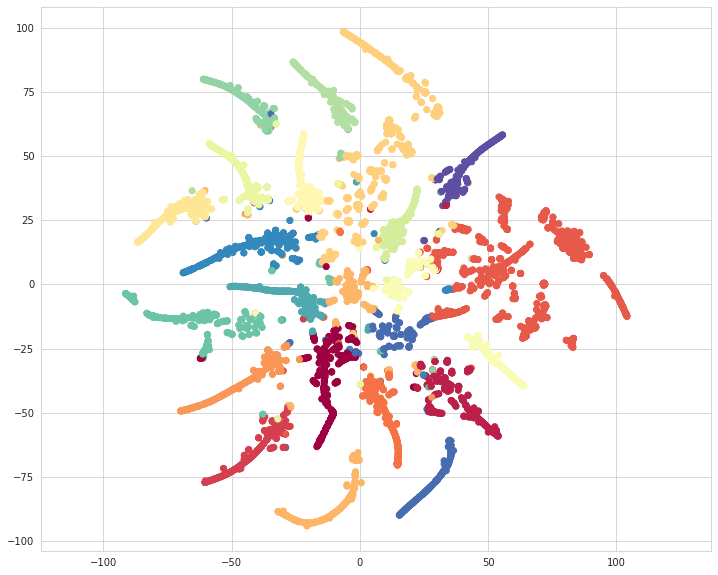

In [ ]:
plt.subplots(figsize = (12, 10));
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = incidentsData['topic'], cmap = plt.cm.Spectral);

In [ ]:
count_vectorizer = CountVectorizer(max_df=1000, min_df=3)

transformed_vector = count_vectorizer.fit_transform(X)

In [ ]:
feature_names = count_vectorizer.get_feature_names()

In [ ]:
len(feature_names)

5710

In [ ]:
feature_names[1000:1005]

['arbeiten', 'arbeitsplatz', 'arcgonvy', 'archive', 'archived']

In [ ]:
NUM_TOPICS = 20

lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100)

lda = lda_model.fit_transform(transformed_vector)

In [ ]:
def get_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(lda_model.components_):

        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            return " ".join(top_feature_names)

In [ ]:
for i in range(20):
    print("Topic %d:" % (i))

    print(get_topic(i, top_words=3))

Topic 0:
this with have
Topic 1:
0x0 asa inside
Topic 2:
installation ms defekt
Topic 3:
cid update image001
Topic 4:
laptop pc need
Topic 5:
password reset account
Topic 6:
order delivery we
Topic 7:
report uacyltoe hxgaycze
Topic 8:
access user device
Topic 9:
this or ticket
Topic 10:
server space over
Topic 11:
no yes na
Topic 12:
00 job job_scheduler
Topic 13:
unable outlook vpn
Topic 14:
down usa since
Topic 15:
nicht mit die
Topic 16:
printer print if
Topic 17:
event ip id
Topic 18:
sent this you
Topic 19:
monitor now 15


In [ ]:
topic_id_topic_mapping = {}

for i in range(20):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
topic_id_topic_mapping

{0: 'this with have',
 1: '0x0 asa inside',
 2: 'installation ms defekt',
 3: 'cid update image001',
 4: 'laptop pc need',
 5: 'password reset account',
 6: 'order delivery we',
 7: 'report uacyltoe hxgaycze',
 8: 'access user device',
 9: 'this or ticket',
 10: 'server space over',
 11: 'no yes na',
 12: '00 job job_scheduler',
 13: 'unable outlook vpn',
 14: 'down usa since',
 15: 'nicht mit die',
 16: 'printer print if',
 17: 'event ip id',
 18: 'sent this you',
 19: 'monitor now 15'}

In [ ]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(NUM_SAMPLES):
    most_likely_topic =  lda[i].argmax()

    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic] = []

    topic_to_doc_mapping[most_likely_topic].append(i)
    
    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])

incidentsData['Most_Likely_Topic'] = topic_list
incidentsData['Most_Likely_Topic_Names'] = topic_names

In [ ]:
print(topic_to_doc_mapping[0][:100])

In [ ]:
topic_of_interest = 19

doc_ids = topic_to_doc_mapping[topic_of_interest][:4]

for doc_index in doc_ids:
    print(X.iloc[doc_index])

outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfolderï¼Œofficeæç¤ºæ›´æ–°ã€‚
ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢«æ³¨é”€ï¼Œæ— æ³•ç™»å½•crmç³»ç»Ÿã€‚
msd - office 2013 outlook æ‰“ä¸å¼€ï¼Œæ˜¾ç¤ºæ— æ³•åˆ›å»ºæ–°çš„å †æ ˆé˜²æŠ¤é¡µé¢ please provide details of the issue.
[â€Ž2016/â€Ž10/â€Ž25 9:36] melhduty gqchtedl: 
hi 
æˆ‘çš„ç”µè„‘é‚®ç®±æ‰“ä¸å¼€äº†
ä½ å¯ä»¥å¸®æˆ‘å—ï¼Ÿ
è°¢è°¢
[â€Ž2016/â€Ž10/â€Ž25 9:38] melhduty gqchtedl: 
æ˜¾ç¤ºç³»ç»Ÿé”™è¯¯
æ˜¾ç¤ºæ— æ³•åˆ›å»ºæ–°çš„å †æ ˆé˜²æŠ¤é¡µé¢
[â€Ž2016/â€Ž10/â€Ž25 9:40] obuwfnkm ufpwmybi: 
æŠŠä½ æ¡Œé¢å…±äº«ç»™æˆ‘
[â€Ž2016/â€Ž10/â€Ž25 9:41] melhduty gqchtedl: 
id 

çœ‹ä¸è§a3 çš„æ–‡ä»¶å¤¹ï¼ˆ\\HostName_17\teams\business\ a3 ï¼‰ï¼Œè¯·å¸®å¿™å¼„ä¸€ä¸‹ã€‚sahtym wanthryg 


In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors = 20, n_components = 2)

In [ ]:
lda_2d_isomap = isomap.fit_transform(lda)

In [ ]:
lda_df_isomap = pd.DataFrame(lda_2d_isomap)

lda_df_isomap.head()

0         1
0  0.170935  0.037641
1 -0.457801  0.132597
2  0.017233  0.383353
3  0.048791  0.525409
4  0.154829  0.469272

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
incidentsData['Assignment group'] = label_encoder.fit_transform(incidentsData['Assignment group'])

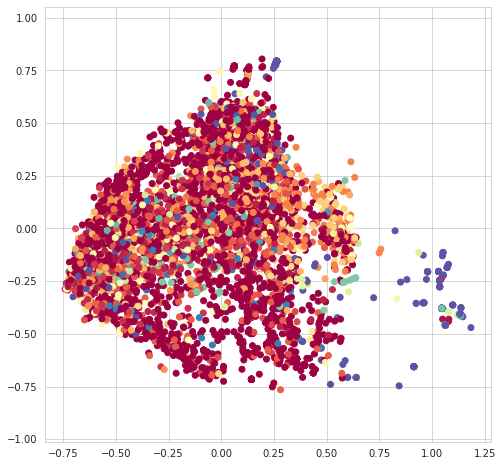

In [ ]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_isomap[0], lda_df_isomap[1], c = incidentsData['Assignment group'], cmap = plt.cm.Spectral)

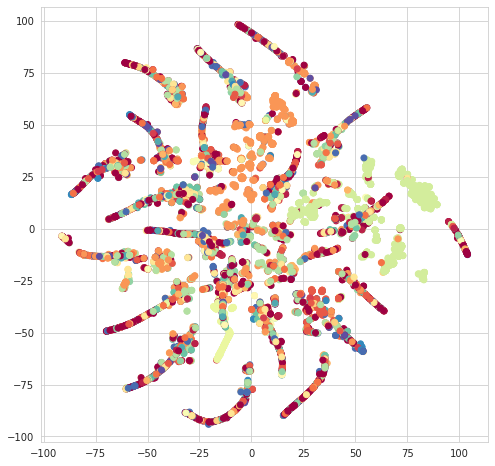

In [ ]:
plt.subplots(figsize = (8, 8))
plt.axis('equal');

plt.scatter(lda_df_tsne[0], lda_df_tsne[1], c = incidentsData['Most_Likely_Topic'], cmap = plt.cm.Spectral)

In [ ]:
!pip install pyldavis -q

     |████████████████████████████████| 1.6MB 12.8MB/s 


In [ ]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

In [ ]:
panel = pyLDAvis.sklearn.prepare(lda_model, transformed_vector, count_vectorizer, mds='tsne')

panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      -10.878068   10.538728       1        1  17.240047
11     -60.884026  -75.591820       2        1   9.945188
12      -2.336119  -53.289074       3        1   8.315054
17     -61.385319  -12.914634       4        1   5.976175
1      -28.737743  126.296997       5        1   5.784719
5        1.066606 -123.552811       6        1   5.601637
8       45.140720   -7.947869       7        1   5.449512
18    -140.795975  -98.530548       8        1   5.245301
9       61.531681  -83.240562       9        1   4.673516
13     -72.563057 -140.396881      10        1   4.601549
15      15.984491   63.578186      11        1   4.210929
4     -160.851624   68.945145      12        1   3.670964
6       85.961830   51.922935      13        1   3.460836
16     -99.020836  109.936348      14        1   3.052672
3     -176.764130   -8.681684      15        1   3.010203
14    -117.189880  -37.420200      16        1   2.878897
10     108.829918  -22.946203      17        1   1.888511
7       47.588097  121.934814      18        1   1.871508
19    -106.467834   30.176889      19        1   1.773736
2      -50.613804   59.328842      20        1   1.349049, topic_info=               Term         Freq        Total Category  logprob  loglift
0                00  2098.000000  2098.000000  Default  30.0000  30.0000
2913            job  1851.000000  1851.000000  Default  29.0000  29.0000
2975  job_scheduler  1801.000000  1801.000000  Default  28.0000  28.0000
3770       password  1484.000000  1484.000000  Default  27.0000  27.0000
2176         failed  1614.000000  1614.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
2377         german    15.425081    32.151914  Topic20  -5.2127   3.5713
2803        install    17.428044   147.498441  Topic20  -5.0906   2.1700
3252         mailto    18.417720   297.830840  Topic20  -5.0354   1.5226
834             add    17.232267   187.673721  Topic20  -5.1019   1.9178
1308           call    17.116359   250.729971  Topic20  -5.1087   1.6214

[1217 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         3  0.995853     00
0         4  0.002382     00
0         5  0.001429     00
2         4  0.986246   0000
4        14  0.963625  00001
...     ...       ...    ...
5686     19  0.968116     œé
5687     20  0.910181     šã
5688     20  0.963583     šä
5696     19  0.979271  ž2016
5700     15  0.947082    žæž

[2496 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 12, 13, 18, 2, 6, 9, 19, 10, 14, 16, 5, 7, 17, 4, 15, 11, 8, 20, 3])

#  <h3><font color='#00A0B8' font-family='Helvetica'>**Feature Transformation using NLP Pipeline**</font></h3>

In [16]:
!pip install normalise -q
!sudo apt install openjdk-8-jdk -q
!sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java 
!pip install language-check -q
!pip install pycontractions -q

import numpy as np
import multiprocessing as mp
import re 

import nltk
for dependency in ("brown", "names", "wordnet", "averaged_perceptron_tagger", "universal_tagset"):
    nltk.download(dependency,quiet=True)

import string
import spacy 
import en_core_web_sm
from nltk.tokenize import word_tokenize
from sklearn.base import TransformerMixin, BaseEstimator
from normalise import normalise
from pycontractions import Contractions

cont = Contractions(api_key="glove-twitter-100") #A Python library for expanding and creating common English contractions in text.
nlp = en_core_web_sm.load()

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                #  key,
                 variety="BrE",
                 user_abbrevs={},
                 n_jobs=1):
   
        # self.key = key
        self.variety = variety
        self.user_abbrevs = user_abbrevs
        self.n_jobs = n_jobs
       

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _preprocess_text(self, text):
        
        doc = cont.expand_texts(text) #I'd -> I would , I'd -> I had
        doc = self._remove_email_and_format(text)
        doc = nlp(doc)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)       
        return self._lemmatize(removed_stop_words)

    def _normalize(self, text):       
        try:
            return ' '.join(normalise(text, variety=self.variety, user_abbrevs=self.user_abbrevs, verbose=False))
        except:
            return text

    def _remove_punct(self, doc):
        return [t for t in doc if t.text not in string.punctuation]

    def _remove_stop_words(self, doc):
      customize_stop_words = ['hi','hello','regards','dear','best','thanks','please','appreciate', 'great', 'day']
      for w in customize_stop_words:
        nlp.vocab[w].is_stop = True

      return [t for t in doc if not t.is_stop]

    def _remove_email_and_format(self, doc):     
      doc = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", doc).split())
      return doc.strip()

    def _lemmatize(self, doc):
      return ' '.join([t.lemma_ for t in doc])

In [28]:
text = TextPreprocessor(n_jobs=-1).transform(incidentsData['New_Description'])

#  <h3><font color='#00A0B8' font-family='Helvetica'>**Handling Imbalanced Data**</font></h3>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


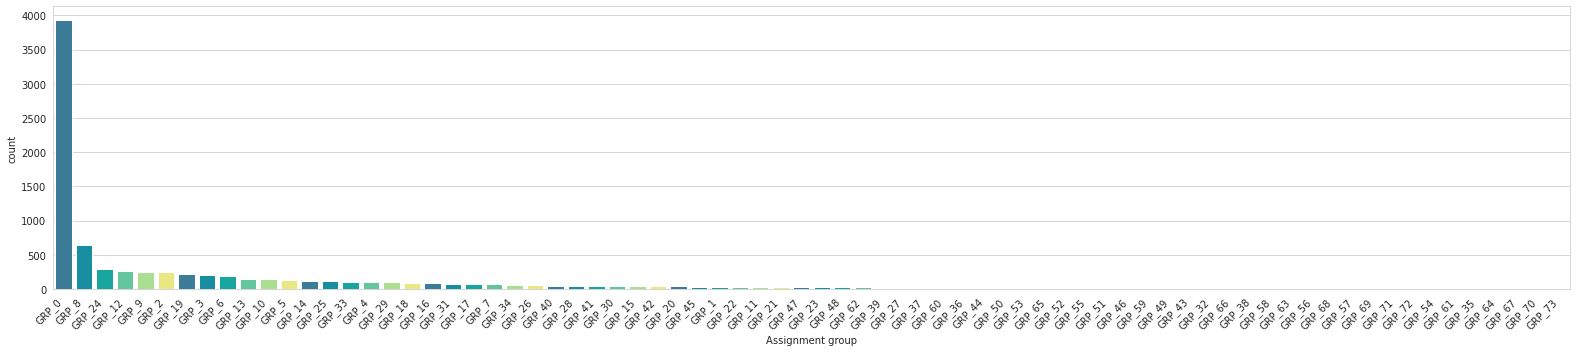

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
%matplotlib inline
sns.set_style("whitegrid")
flatui = ['#2E82A8','#00A0B8','#00BDB4','#53D69F','#A5EB84','#F9F871']

descending_order = incidentsData['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))

ax=sns.countplot(x='Assignment group', data=incidentsData, palette = sns.color_palette(flatui),order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [18]:
incidentsData[incidentsData['Assignment group']=='GRP_0'].shape

(3934, 6)

*   We can see that data is highly imbalanced.
*   From all data, ~50% of the data belongs to GRP_0 
*   Also, some groups have very few count e.g. groups with 1 entry
*   We can merge such group with small count of tickets



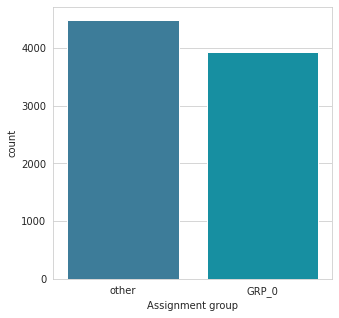

In [19]:
incidentsData_Group_minor = incidentsData.copy()
incidentsData_Group_minor['Assignment group'] = incidentsData_Group_minor['Assignment group'].apply(lambda x : 'other' if x not in ['GRP_0'] else x)#,'GRP_8' ,'GRP_9','GRP_12','GRP_24']

descending_order = incidentsData_Group_minor['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=incidentsData_Group_minor, palette = sns.color_palette(flatui),order=descending_order)

incidentsData_Others = incidentsData[incidentsData['Assignment group']!='GRP_0']
max_incident_cnt = incidentsData['Assignment group'].value_counts().max()

##<font color='#00A0B8' font-family='Helvetica'>**1. Up-sample Minority Class**</font> <br/>
Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal. We will use resample with replacement. <br/>
We'll create a new DataFrame with an up-sampled minority class. Here are the steps:

*  First, we'll separate observations from each class into different DataFrames.
*  Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
*  Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.


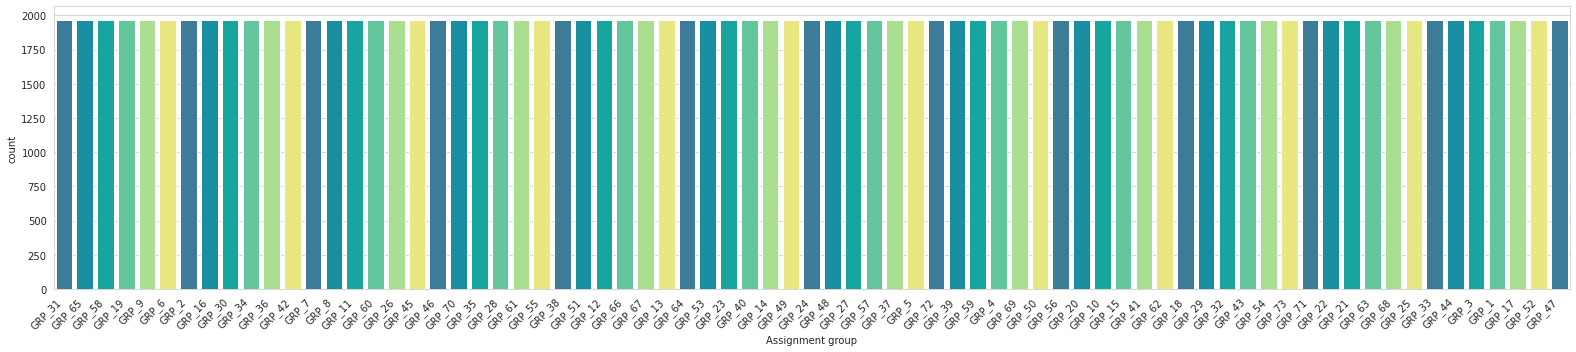

In [20]:

# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample

incidentsData_upsampled = incidentsData_Others[0:0]

# Upsample minority class
for grp in incidentsData_Others['Assignment group'].unique():
    incidentsData_Group = incidentsData_Others[incidentsData_Others['Assignment group'] == grp]
    resampled = resample(incidentsData_Group, 
                         replace=True, # sample with replacement
                         n_samples=int(max_incident_cnt/2), 
                         random_state=123) # reproducible results
    
    incidentsData_upsampled = incidentsData_upsampled.append(resampled)

incidentsData_Others_upsample = pd.concat([incidentsData_Group_minor[incidentsData_Group_minor['Assignment group']=='GRP_0'],incidentsData_upsampled])
incidentsData_Others_upsample.reset_index(inplace=True)

descending_order = incidentsData_upsampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=incidentsData_upsampled, palette = sns.color_palette(flatui),order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [21]:
incidentsData_upsampled[incidentsData_upsampled['Assignment group']=='GRP_0'].shape

(0, 6)

In [22]:
incidentsData_Others_upsample[incidentsData_Others_upsample['Assignment group']=='other'].shape

(0, 7)

In [23]:
inc_dataLoader.getUniqueAssignmentGroups(incidentsData_Others_upsample)

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [24]:
inc_dataLoader.getUniqueAssignmentGroups(incidentsData_upsampled)

array(['GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

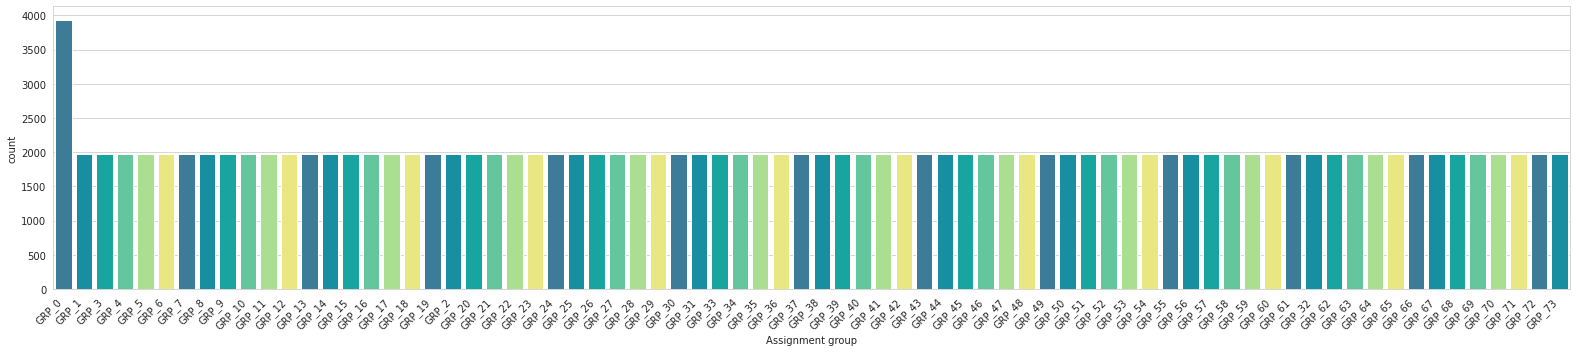

In [25]:
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
import matplotlib.pyplot as plt
#add to remove warning for python 3.6 dependency
import warnings
import pandas.util.testing as tm
%matplotlib inline

descending_order = incidentsData_Others_upsample['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))

ax=sns.countplot(x='Assignment group', data=incidentsData_Others_upsample, palette = sns.color_palette(flatui))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [26]:
incidentsData_Others_upsample.shape

(147525, 7)

##<font color='#00A0B8' font-family='Helvetica'>**Using SMOTE**</font> <br/>

Oversampling increases the weight of the minority class by replicating the minority class examples. Although it does not increase information, it raises the **over-fitting issue**, which causes the model to be too specific. It may well be the case that the accuracy for the training set is high, yet the performance for new datasets is actually worse.

Synthetic Minority Over-sampling Technique (**SMOTE**). This method is considered a state-of-art technique and one of the most commonly used oversampling methods <u>to solve the imbalance problem.</u> This method generates synthetic data based on the feature space similarities between existing minority instances. In order to create a synthetic instance, it finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.

However, we have <u>challenge to use SMOTE technique</u> for our dataset.
As we are having 74 classes and 8417 samples in the training set. so on average each sample should have atleast 113 samples per class. However, our dataset is extremely imbalanced.  There are classes with only one samples and  the number of neighbors is 6. So, we cannot use only SMOTE.

We will try to solve this problem by <u>combining RandomOverSampler and SMOTE.</u>

**Random oversampling for the minority class** </br>
Random oversampling simply replicates randomly the minority class examples. Random oversampling is known to increase the likelihood of occurring overfitting. However, we will use SMOTE to overcome this issue as shown below

<p>

```
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(vectorized_df, y)

smote = SMOTE()
X_smote,y_smote = smote.fit_sample(X_ROS, y_ROS)
```
</p>


#  <h3><font color='#00A0B8' font-family='Helvetica'>**ML Modeling**</font></h3>

## <h4><font color='#00A0B8' font-family='Helvetica'>Model Output</font></h4>

In [27]:
# Create DataFrame to store ModelPerformance result
resultColumn_names = ('Model', 'Train_Acc', 'Test_Acc' ,'Precision', 'Recall', 'F1_Score')
resultsDf = pd.DataFrame(columns = resultColumn_names)

In [28]:
# Store result in CSV
def save_model_result(overwrite=False):
  global resultsDf
  if 'New_ID' in resultsDf:
      resultsDf.drop('New_ID',axis=1)
  if 'New_ID' not in resultsDf:
      resultsDf.insert(0, 'New_ID', range(0,  len(resultsDf)))
  resultsDf = resultsDf.set_index('New_ID')

  if overwrite == True:
    resultsDf.to_csv(project_path + 'model-output.csv', header=True, index=True)
  else:   
    resultsDf.to_csv(project_path + 'model-output.csv', header=False, index=True, mode='a')
save_model_result()

In [29]:
def get_model_result_fromFile():
  df = pd.read_csv(project_path + 'model-output.csv')
  df['New_ID'] = range(1, 1+len(df))
  return df

In [30]:
def update_model_score(model_name, train_accuracy, accuracy, precision, recall, f1_score):
  global resultsDf
  #Store the accuracy results for each model in a dataframe for final comparison  
  tempResultsDf = pd.DataFrame({'Model':[model_name], 'Train_Acc':train_accuracy,'Test_Acc': accuracy, 'Precision': precision,
                                'Recall':recall, 'F1_Score':f1_score})
  tempResultsDf = tempResultsDf[['Model', 'Train_Acc','Test_Acc', 'Precision', 'Recall', 'F1_Score']]
  resultsDf = resultsDf.append(tempResultsDf)
  return resultsDf

In [31]:
# Function To display Model Performance
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def PrintModelPerformanceReport(model, x_train, y_train, x_test, y_test,  modelType):    
    # Fit the model
    model.fit(x_train, y_train)
    
    #predict on test 
    y_predict = model.predict(x_test)
    avg_method='weighted'

    print(colors.get('BOLD') + colors.get('DARKCYAN')+ '--'*30 + colors.get('END'))
    print(colors.get('BOLD') + colors.get('BLUE')+'\t\t\t'+modelType + colors.get('END'))
    print(colors.get('BOLD') + colors.get('DARKCYAN')+ '--'*30 + colors.get('END'))

    acc_Test = accuracy_score(y_test,y_predict,normalize=True)
    precision = precision_score(y_test, y_predict, average=avg_method, labels=np.unique(y_predict))
    recall = recall_score(y_test, y_predict, average=avg_method, labels=np.unique(y_predict))
    accuracy_count = accuracy_score(y_test, y_predict,normalize=False)
    f1_score = 2 * (precision * recall) / (precision + recall)
   
    acc_Train = model.score(x_train, y_train)   

    print('Train Accuracy Score: \t',acc_Train)
    print('Test Accuracy Score: \t',acc_Test)
    print('Precision: \t\t',precision)
    print('Recall: \t\t',recall)  
    print('F1 Score: \t\t',f1_score) 
    print('Accuracy Count: \t',accuracy_count)
    print("Length of testing data: ", len(y_test))
    print(colors.get('BOLD') + colors.get('DARKCYAN')+ '--'*30 + colors.get('END'))  

    update_model_score(modelType, acc_Train, acc_Test, precision, recall, f1_score)

## <h4><font color='#00A0B8' font-family='Helvetica'>1. ML Models</font></h4>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(incidentsData['New_Description'], incidentsData['Assignment group'], test_size = 0.2,random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

tf_pipeline = Pipeline([                         
                          ('to_dense', TextPreprocessor()),
                          ('vect', TfidfVectorizer()),
                          ('tfidf', TfidfTransformer()) ])

pipeline_ct = make_pipeline(
     TextPreprocessor(),
     CountVectorizer(ngram_range=(2,2)), 
     TfidfTransformer(),
     FunctionTransformer(lambda x: x.todense(), accept_sparse=True))

In [ ]:
models = []

models.append(('Naïve Bayes - Original Data', GaussianNB(), pipeline_ct))
models.append(('SVM - Original Data', SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), tf_pipeline))
models.append(('Multinomial Naïve Bayes - Original Data',  MultinomialNB(), pipeline_ct))
models.append(('SGD Classifier - Original Data', SGDClassifier(loss='hinge', verbose=0,random_state=1, learning_rate='invscaling',eta0=1),pipeline_ct))
models.append(('Decision Tree - Original Data', DecisionTreeClassifier(), tf_pipeline))
models.append(('Random Forest - Original Data', RandomForestClassifier(),pipeline_ct))
models.append(('AdaBoost - Original Data', AdaBoostClassifier(),tf_pipeline))
models.append(('Bagging - Original Data', BaggingClassifier(n_estimators=100),tf_pipeline))
models.append(('Gradient Boosting - Original Data', GradientBoostingClassifier(),tf_pipeline))
models.append(('ExtraTrees - Original Data',ExtraTreesClassifier(n_estimators = 100),tf_pipeline))

In [ ]:
for name, model, pipeline in models:
   pipe = Pipeline([ ('features', pipeline),
                    ('model',model)
                  ])    
   PrintModelPerformanceReport(pipe, x_train, y_train, x_test, y_test, name)
save_model_result()

------------------------------------------------------------
			Decision Tree - Original Data
------------------------------------------------------------
Train Accuracy Score: 	 0.9928709342046635
Test Accuracy Score: 	 0.5896674584323041
Precision: 		 0.5951454112657192
Recall: 		 0.5953237410071942
F1 Score: 		 0.5952345627797491
Accuracy Count: 	 993
Length of testing data:  1684
------------------------------------------------------------
------------------------------------------------------------
			Random Forest - Original Data
------------------------------------------------------------
Train Accuracy Score: 	 0.9901975345314125
Test Accuracy Score: 	 0.6051068883610451
Precision: 		 0.6538515389202167
Recall: 		 0.6341008089607966
F1 Score: 		 0.6438247353664897
Accuracy Count: 	 1019
Length of testing data:  1684
------------------------------------------------------------
------------------------------------------------------------
			AdaBoost - Original Data
--------------

In [ ]:
save_model_result(True)

In [ ]:
resultsDf

In [ ]:
#Try Good performing models on upsampled data
x_train, x_test, y_train, y_test = train_test_split(incidentsData_Others_upsample['New_Description'], incidentsData_Others_upsample['Assignment group'], test_size = 0.2,random_state=0)

In [ ]:
models = []
models.append(('Bagging with Over-Sampling', BaggingClassifier(n_estimators=10),tf_pipeline))
models.append(('ExtraTrees with Over-Sampling',ExtraTreesClassifier(n_estimators = 10),tf_pipeline))

In [ ]:
for name, model, pipeline in models:
   pipe = Pipeline([ ('features', pipeline),
                    ('model',model)
                  ]) 
   PrintModelPerformanceReport(pipe, x_train, y_train, x_test, y_test, name)
save_model_result()

------------------------------------------------------------
			Bagging with Over-Sampling
------------------------------------------------------------
Train Accuracy Score: 	 0.9906032875783766
Test Accuracy Score: 	 0.9826470089815286
Precision: 		 0.9841404299176464
Recall: 		 0.9826470089815286
F1 Score: 		 0.9833931524574336
Accuracy Count: 	 28993
Length of testing data:  29505
------------------------------------------------------------
------------------------------------------------------------
			ExtraTrees with Over-Sampling
------------------------------------------------------------
Train Accuracy Score: 	 0.9908998474834774
Test Accuracy Score: 	 0.9890188103711235
Precision: 		 0.9904342737860568
Recall: 		 0.9890188103711235
F1 Score: 		 0.9897260359951939
Accuracy Count: 	 29181
Length of testing data:  29505
------------------------------------------------------------


# <h3><font color='#00A0B8' font-family='Helvetica'>**Word Embeddings**</font></h3>

The word embeddings we explored are 
*   Word2vec
*   TF-IDF 
*   Weighted word2vec
*   Pre-train GloVe word2vec, 
*   Doc2vec and 
*   FastText

In [ ]:
import multiprocessing
import sys
import gensim
from gensim.models.word2vec import Word2Vec

workers = multiprocessing.cpu_count()
print('number of cpu: {}'.format(workers))
assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be slow otherwise."

number of cpu: 2


In [ ]:
doc_words=[]
for i in text:
    li = list(i.split(" "))
    doc_words.append(li)

Here we have chosen the dimension size 100 for each word embedding and window size of 5. The training iterates for 100 times.

In [ ]:
word_model = Word2Vec(doc_words,
                      min_count=2,
                      size=300,
                      window=5,
                      workers=workers,
                      iter=100)

### <h4><font color='#00A0B8' font-family='Helvetica'>Averaging Word Embedding for Each Doc</font></h4>
We will be using the word embedding to compute for representative vector for whole text. It then serves as feature input for text classification model. 

#### <h4><font color='#00A0B8' font-family='Helvetica'>1. Simple Averaging on Word Embedding</font></h4>
This is a straightforward method. It directly averages all word embedding occurred in the text. 



In [ ]:
class MeanEmbeddingVectorizer(object):

	def __init__(self, word_model):
		self.word_model = word_model
		self.vector_size = word_model.wv.vector_size

	def fit(self):  # comply with scikit-learn transformer requirement
		return self

	def transform(self, docs):  # comply with scikit-learn transformer requirement
		doc_word_vector = self.word_average_list(docs)
		return doc_word_vector

	def word_average(self, sent):
		"""
		Compute average word vector for a single doc/sentence.
		:param sent: list of sentence tokens
		:return:
			mean: float of averaging word vectors
		"""
		mean = []
		for word in sent:
			if word in self.word_model.wv.vocab:
				mean.append(self.word_model.wv.get_vector(word))

		if not mean:  # empty words
			# If a text is empty, return a vector of zeros.
			# print("cannot compute average owing to no vector for {}".format(sent))
			return np.zeros(self.vector_size)
		else:
			mean = np.array(mean).mean(axis=0)
			return mean


	def word_average_list(self, docs):
		"""
		Compute average word vector for multiple docs, where docs had been tokenized.
		:param docs: list of sentence in list of separated tokens
		:return:
			array of average word vector in shape (len(docs),)
		"""
		return np.vstack([self.word_average(sent) for sent in docs])

In [ ]:
mean_vec_tr = MeanEmbeddingVectorizer(word_model)
doc_vec = mean_vec_tr.transform(text)

In [ ]:
# Save word averaging doc2vec.
print('Shape of word-mean doc2vec...')
display(doc_vec.shape)
print('Save word-mean doc2vec as csv file...')
np.savetxt(os.path.join(project_path, 'Embeddings/doc_vec.csv'), doc_vec, delimiter=',')

Shape of word-mean doc2vec...


(8417, 300)

Save word-mean doc2vec as csv file...


#### <h4><font color='#00A0B8' font-family='Helvetica'>2. TF-IDF Weighted Averaging on Word Embedding</font></h4>
We can further adopt TF-IDF as weights for each word embedding. This will amplify the role of significant word in computing doc vector. Here, the whole process is implemented under class TfidfEmbeddingVectorizer.


In [ ]:
from collections import defaultdict 
from sklearn.feature_extraction.text import TfidfVectorizer
class TfidfEmbeddingVectorizer(object):

	def __init__(self, word_model):

		self.word_model = word_model
		self.word_idf_weight = None
		self.vector_size = word_model.wv.vector_size

	def fit(self, docs):  # comply with scikit-learn transformer requirement
		"""
		Fit in a list of docs, which had been preprocessed and tokenized,
		such as word bi-grammed, stop-words removed, lemmatized, part of speech filtered.
		Then build up a tfidf model to compute each word's idf as its weight.
		Noted that tf weight is already involved when constructing average word vectors, and thus omitted.
		:param
			pre_processed_docs: list of docs, which are tokenized
		:return:
			self
		"""
		tfidf = TfidfVectorizer()
		tfidf.fit(docs)  # must be list of text string

		# if a word was never seen - it must be at least as infrequent
		# as any of the known words - so the default idf is the max of
		# known idf's
		max_idf = max(tfidf.idf_)  # used as default value for defaultdict
		self.word_idf_weight = defaultdict(lambda: max_idf,
						   [(word, tfidf.idf_[i]) for word, i in tfidf.vocabulary_.items()])
		return self


	def transform(self, docs):  # comply with scikit-learn transformer requirement
		doc_word_vector = self.word_average_list(docs)
		return doc_word_vector


	def word_average(self, sent):
		"""
		Compute average word vector for a single doc/sentence.
		:param sent: list of sentence tokens
		:return:
			mean: float of averaging word vectors
		"""

		mean = []
		for word in sent:
			if word in self.word_model.wv.vocab:
				mean.append(self.word_model.wv.get_vector(word) * self.word_idf_weight[word])  # idf weighted

		if not mean:  # empty words
			# If a text is empty, return a vector of zeros.
			print("cannot compute average owing to no vector for {}".format(sent))
			return np.zeros(self.vector_size)
		else:
			mean = np.array(mean).mean(axis=0)
			return mean


	def word_average_list(self, docs):
		"""
		Compute average word vector for multiple docs, where docs had been tokenized.
		:param docs: list of sentence in list of separated tokens
		:return:
			array of average word vector in shape (len(docs),)
		"""
		return np.vstack([self.word_average(sent) for sent in docs])

In [ ]:
tfidf_vec_tr = TfidfEmbeddingVectorizer(word_model)
tfidf_vec_tr.fit(text)
tfidf_doc_vec = tfidf_vec_tr.transform(text)

In [ ]:
# Save tfidf word averaging doc2vec.
print('Shape of tfidf-word-mean doc2vec...')
display(tfidf_doc_vec.shape)
print('Save tfidf-word-mean doc2vec as csv file...')
np.savetxt(os.path.join(project_path, 'Embeddings/tfidf_doc_vec.csv'), tfidf_doc_vec, delimiter=',')

Shape of tfidf-word-mean doc2vec...


(8417, 300)

Save tfidf-word-mean doc2vec as csv file...


#### <h4><font color='#00A0B8' font-family='Helvetica'>3. Pre-train GloVe Word Embedding</font></h4>
Leveraging the existing pre-trained word embedding and see how it performs in text classification. Here we have used simple averaging on GloVe word vector

In [ ]:
from gensim.test.utils import get_tmpfile, datapath
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Load in GloVe vector.
glove_vec_fi = datapath(project_path + 'glove/glove.6B.300d.txt')
tmp_word2vec_fi = get_tmpfile('glove.6B.300d.txt')

glove2word2vec(glove_vec_fi, tmp_word2vec_fi)

glove_word_model = KeyedVectors.load_word2vec_format(tmp_word2vec_fi)

In [ ]:
# Apply word averaging on GloVe word vector.
glove_mean_vec_tr = MeanEmbeddingVectorizer(glove_word_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [ ]:
glove_doc_vec = glove_mean_vec_tr.transform(text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [ ]:
# Examine if glove_doc_vec is equal to self-trained doc_vec.
print('Examine if glove_doc_vec is equal to self-trained doc_vec...')
glove_doc_vec[4] == doc_vec[4]

In [ ]:
# Save glove word averaging doc2vec.
print('Shape of glove-word-mean doc2vec...')
display(glove_doc_vec.shape)

print('Save glove-word-mean doc2vec as csv file...')
np.savetxt(os.path.join(project_path, 'Embeddings/glove_doc_vec.csv'), glove_doc_vec, delimiter=',')

Shape of glove-word-mean doc2vec...


(8417, 300)

Save glove-word-mean doc2vec as csv file...


### <h4><font color='#00A0B8' font-family='Helvetica'>4. Apply Doc2vec</font></h4>
We will directly train doc2vec,without doing average all word embeddings. Here we have chosen PV-DM model to train doc2vec.
The class just needs to take in the TaggedDocument and then we call self.custom_train() method, the doc model will train itself.

In [ ]:
from gensim.models import Doc2Vec

class DocModel(object):

	def __init__(self, docs, **kwargs):
		"""

		:param docs: list of TaggedDocument
		:param kwargs: dictionary of (key,value) for Doc2Vec arguments
		"""
		self.model = Doc2Vec(**kwargs)
		self.docs = docs
		self.model.build_vocab([x for x in self.docs])

	def custom_train(self, fixed_lr=False, fixed_lr_epochs=None):
		"""
		Train Doc2Vec with two options, without fixed learning rate(recommended) or with fixed learning rate.
		Fixed learning rate also includes implementation of shuffling training dataset.


		:param fixed_lr: boolean
		:param fixed_lr_epochs: num of epochs for fixed lr training
		"""
		if not fixed_lr:
			self.model.train([x for x in self.docs],
					 total_examples=len(self.docs),
					 epochs=self.model.epochs)
		else:
			for _ in range(fixed_lr_epochs):
				self.model.train(utils.shuffle([x for x in self.docs]),
						 total_examples=len(self.docs),
						 epochs=1)
				self.model.alpha -= 0.002
				self.model.min_alpha = self.model.alpha  # fixed learning rate


	def test_orig_doc_infer(self):
		"""
		Use the original doc as input for model's vector inference,
		and then compare using most_similar()
		to see if model finds the original doc id be the most similar doc to the input.
		"""
		idx = np.random.randint(len(self.docs))
		print('idx: ' + str(idx))
		doc = [doc for doc in self.docs if doc.tags[0] == idx]
		inferred_vec = self.model.infer_vector(doc[0].words)
		print(self.model.docvecs.most_similar([inferred_vec]))  # wrap vec in a list

In [ ]:
# Configure keyed arguments for Doc2Vec model.
dm_args = {
    'dm': 1,
    'dm_mean': 1,
    'vector_size': 100,
    'window': 5,
    'negative': 5,
    'hs': 0,
    'min_count': 2,
    'sample': 0,
    'workers': workers,
    'alpha': 0.025,
    'min_alpha': 0.025,
    'epochs': 100,
    'comment': 'alpha=0.025'
}

In [ ]:
from gensim.models.doc2vec import TaggedDocument

doc_ids = np.arange(len(text))
tagdocs = [TaggedDocument(words=words, tags=[tag]) for words, tag in zip(text, doc_ids)]

In [ ]:
# Instantiate a pv-dm model.
dm = DocModel(docs=tagdocs, **dm_args)

In [ ]:
dm.custom_train()

In [ ]:
# Save doc2vec as feature dataframe.
dm_doc_vec_list = []
for i in range(len(dm.model.docvecs)):
    dm_doc_vec_list.append(dm.model.docvecs[i])


dm_doc_vec = pd.DataFrame(dm_doc_vec_list)
print('Shape of dm doc2vec...')
display(dm_doc_vec.shape)

print('Save dm doc2vec as csv file...')
dm_doc_vec.to_csv(os.path.join(project_path , 'Embeddings/dm_doc_vec.csv'), index=False, header=False)

Shape of dm doc2vec...


(8417, 100)

Save dm doc2vec as csv file...


### <h4><font color='#00A0B8' font-family='Helvetica'>5. Fast Text</font></h4>
We will directly train doc2vec,without doing average all word embeddings. Here we have chosen PV-DM model to train doc2vec.
The class just needs to take in the TaggedDocument and then we call self.custom_train() method, the doc model will train itself.

In [ ]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 300    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        

In [ ]:
# sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(text, size=feature_size, window=window_context, 
                    min_count=min_word_count,sg=1, iter=100)

In [ ]:
# Apply word averaging on Fast Text word vector.
ft_mean_vec_tr = MeanEmbeddingVectorizer(ft_model)

In [ ]:
ft_doc_vec = ft_mean_vec_tr.transform(text)

In [ ]:
# Save Fast Text word averaging doc2vec.
print('Shape of glove-word-mean doc2vec...')
print(ft_doc_vec.shape)

print('Save fastText-word-mean doc2vec as csv file...')
np.savetxt(os.path.join(project_path, 'Embeddings/fast_text_vec.csv'), ft_doc_vec, delimiter=',')

Shape of glove-word-mean doc2vec...
(8417, 300)
Save fastText-word-mean doc2vec as csv file...


# <h4><font color='#00A0B8' font-family='Helvetica'>Word Embeddings in ML Models</font></h4>

In [ ]:
import os
import pandas as pd

# Read in saved files.
doc_vec = pd.read_csv(os.path.join(project_path, 'Embeddings/doc_vec.csv'), header=None)
tfidf_doc_vec = pd.read_csv(os.path.join(project_path, 'Embeddings/tfidf_doc_vec.csv'), header=None)
glove_doc_vec = pd.read_csv(os.path.join(project_path, 'Embeddings/glove_doc_vec.csv'), header=None)
dm_doc_vec = pd.read_csv(os.path.join(project_path, 'Embeddings/dm_doc_vec.csv'), header=None)
ft_doc_vec = pd.read_csv(os.path.join(project_path, 'Embeddings/fast_text_vec.csv'), header=None)


In [ ]:
df = ft_doc_vec
concate = False
concat_df = dm_doc_vec

In [ ]:
import math
from sklearn.model_selection import train_test_split

def main(model, df, concate, concat_df,target_labels):
    if concate:
        df = pd.concat([pd.DataFrame(df), pd.DataFrame(concat_df)], axis=1, ignore_index=True)
    else:
        df = df

    # Specify train/valid/test size.
    train_size, valid_size, test_size = split_size(df, train=0.8, valid=0.)  # no need to use valid dataset here
    
    # Prepare test dataset.
    train_X, test_X, train_y, test_y = train_test_split(df,
                                                    target_labels,
                                                    test_size=test_size,
                                                    random_state=1)
                                                   

    # Prepare valid dataset.
    if valid_size != 0:
        train_X, valid_X, train_y, valid_y = train_test_split(train_X,
                                                      train_y,
                                                      test_size=valid_size,
                                                      random_state=1,
                                                      stratify=train_y)
    
    print('Shape of train_X: {}'.format(train_X.shape))
    print('Shape of train_Y: {}'.format(train_y.shape))
    print('Shape of valid_X: {}'.format(valid_X.shape if 'valid_X' in vars() else (0,0)))
    print('Shape of text_X: {}'.format(test_X.shape))
    
    # model.fit(train_X, train_y)
    
    if valid_size != 0:
        return model, train_X, valid_X, test_X, train_y, valid_y, test_y
    else:
        return model, train_X, None, test_X, train_y, None, test_y

def split_size(df, train=0.5, valid=0.3):
    train_size = math.floor(len(df) * train)
    valid_size = math.floor(len(df) * valid)
    test_size = len(df) - train_size - valid_size
    return train_size, valid_size, test_size

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
models = []

models.append(('SGD Classifier', SGDClassifier(loss='hinge',                   
                    verbose=0,
                    random_state=1,
                    learning_rate='invscaling',
                    eta0=1)))
models.append(('SVM', SVC(C=1.0, kernel='linear', degree=3, gamma='auto')))

In [ ]:
for name, model in models:
  clf, x_train, valid_X, x_test, y_train, valid_y, y_test = main(model, df, concate=False, 
                                                               concat_df=concat_df, target_labels = incidentsData['Assignment group']
                                                              )
  PrintModelPerformanceReport(clf, x_train, y_train, x_test, y_test, name)

#  <h3><font color='#00A0B8' font-family='Helvetica'>**Deep Learning Modeling**</font></h3>

## <h4><font color='#00A0B8' font-family='Helvetica'>Model Definations</font></h4>

In [17]:
# load the whole embedding into memory
def loadEmbeddingDictionary(embeddingType):
  switcher = { 
        "glove": project_path + 'Embeddings/glove_doc_vec.csv', 
        "original_glove": project_path + 'glove/glove.6B.300d.txt', 
        "doc2vec": project_path + 'Embeddings/dm_doc_vec.csv', 
        "fast_text": project_path + 'Embeddings/fast_text_vec.csv',
        "word2vec-TfIdf": project_path + 'Embeddings/tfidf_doc_vec.csv',
        "word2vec-sim-avg": project_path + 'Embeddings/doc_vec.csv'
    }
  
  file_name = switcher.get(embeddingType, "") 
  embeddings_index = dict()
  f = open(file_name)
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  print('Loaded %s word vectors.' % len(embeddings_index))
  return embeddings_index

In [18]:
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
def getVariables_and_EmbeddingMatrix(doc_words,numWords, embedding_dimension, embeddings_index, oversampling=False):

  tokenizer = Tokenizer(num_words=numWords, lower=True,split=' ', char_level=False)
  tokenizer.fit_on_texts(doc_words)
  sequences = tokenizer.texts_to_sequences(doc_words)
  X = pad_sequences(sequences, maxlen=maxlen)
  labels = to_categorical(np.asarray(incidentsData['Assignment group']))
  if oversampling == True:
      label_encoder = preprocessing.LabelEncoder()       
      labels = to_categorical(np.asarray(
                                      label_encoder.fit_transform(incidentsData_Others_upsample['Assignment group'])))

  embedding_matrix = np.zeros((numWords+1, embedding_dimension))
  for i,word in tokenizer.index_word.items():
    if i<numWords+1:
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
  return X, labels, embedding_matrix

In [19]:
from sklearn.model_selection import train_test_split
def splitData(X,y):
    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)    
    print("Number of train Samples:", len(x_train))
   
    return x_train, x_test, y_train, y_test

In [20]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding,Input
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding,Bidirectional
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Input
import tensorflow as tf
# from tensorflow.keras.utils import plot_model

def get_LSTM_Model(numWords, input_length, output_dimension, weights, additional_mectrics=False):
  model = Sequential(name="LSTMSequential")
  model.add(Embedding(numWords, output_dim=output_dimension, input_length=input_length, weights=[weights], trainable=False,name="Embedding"))
  model.add(Bidirectional(LSTM(128),name="BidirectionalLSTM"))
  model.add(Dropout(0.3, name="Dropout"))
  model.add(Dense(100, activation='relu',name="Dense"))
  model.add(Dense(y_train.shape[1], activation='softmax',name="DenseOutput"))

  optimzer = keras.optimizers.Adam(clipvalue=0.5) # clip value to avoid the gradient exploding

  if additional_mectrics == True:
    model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['acc',f1_m,precision_m, recall_m])
  else:
    model.compile(loss='categorical_crossentropy', optimizer=optimzer,metrics=['acc'])
  
  model.summary()
  # plot_model(model,to_file="LSTM_Model.jpg")
  return model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding,Input
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding,Bidirectional
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Input
import tensorflow as tf

def get_RNN_Model(numWords, input_length, output_dimension, weights, additional_mectrics=False):
        model = Sequential(name="RNNSequential")
        model.add(Embedding(numWords, output_dim=output_dimension, input_length=input_length, weights=[weights], trainable=False,name="Embedding"))
        model.add(Conv1D(100,10,activation='relu',name="Conv1D-1"))
        model.add(MaxPooling1D(pool_size=2,name="MaxPooling1D-1"))
        model.add(Dropout(0.3, name="Dropout-1"))
        model.add(Conv1D(100,10,activation='relu',name="Conv1D-2"))
        model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
        model.add(Bidirectional(LSTM(128), name="Bidirectional_LSTM"))
        model.add(Dropout(0.3, name="Dropout-2"))
        model.add(Dense(100,activation='relu', name="Dense"))
        model.add(Dense(y_train.shape[1], activation='softmax',name="DenseOutput"))

        optimzer = keras.optimizers.Adam(clipvalue=0.5) # clip value to avoid the gradient exploding
        if additional_mectrics == True:
          model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['acc',f1_m,precision_m, recall_m])
        else:
          model.compile(loss='categorical_crossentropy', optimizer=optimzer,metrics=['acc'])
        
        model.summary()
        # plot_model(model,to_file="LSTM_Model.jpg")
        return model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding,Input
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding,Bidirectional
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Input
import tensorflow as tf

def get_GRU_Model(numWords, input_length, output_dimension, weights, additional_mectrics=False):
      model = Sequential(name="GRUSequential")
      model.add(Embedding(numWords, output_dim=output_dimension, input_length=input_length, weights=[weights], trainable=False,name="Embedding"))
      model.add(GRU(128, name="GRU"))
      model.add(Dropout(0.3, name="Dropout"))      
      model.add(Dense(100,activation='relu', name="Dense"))
      model.add(Dense(y_train.shape[1], activation='softmax',name="DenseOutput"))

      optimzer = keras.optimizers.Adam(clipvalue=0.5) # clip value to avoid the gradient exploding
      if additional_mectrics == True:
        model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['acc',f1_m,precision_m, recall_m])
      else:
        model.compile(loss='categorical_crossentropy', optimizer=optimzer,metrics=['acc'])
      
      model.summary()
      # plot_model(model,to_file="LSTM_Model.jpg")
      return model

In [24]:
def EvaluateModel(model, modelName, x_test, y_test, train_accuracy,additional_mectrics=False):
  if additional_mectrics == True:
    loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
    update_model_score(modelName,train_accuracy,accuracy,precision,recall,f1_score)
  else:
     loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
     update_model_score(modelName,train_accuracy,accuracy,'-','-','-')

In [25]:
 import matplotlib.pyplot as plt
 def plot_ModelAccuracy_Loss(history, modelname):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.plot(history.history['acc'],color='#00A0B8')
    plt.plot(history.history['val_acc'],color='coral')

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
   

    plt.subplot(2,2,2)
    plt.plot(history.history['loss'],color='#00A0B8')
    plt.plot(history.history['val_loss'],color='coral')

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [26]:
def TrainModel(model, modelname, x_train, y_train, epochs, batch_size, verbose):
  history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size, validation_split=0.2, verbose=verbose)
  plot_ModelAccuracy_Loss(history, modelname=modelname)
  return np.mean(history.history['acc'])

In [29]:
doc_words=[]
for i in text:
    li = list(i.split(" "))
    doc_words.append(li)

## <h4><font color='#00A0B8' font-family='Helvetica'>1.LSTM Model</font></h4>

In [ ]:
incidentsData = inc_dataLoader.encodeAssignmentGroup(incidentsData)

### <h4><font color='#00A0B8' font-family='Helvetica'>Word2Vec with Simple  Averaging</font></h4>

In [ ]:
embeddings_index = loadEmbeddingDictionary('word2vec-sim-avg')

Loaded 7666 word vectors.


In [ ]:
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Word2Vec(Simple Averaging)'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words,numWords, 300, embeddings_index)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, labels)

Number of Samples: 8417
Number of Labels:  8417
Number of train Samples: 6733


In [ ]:
model = get_LSTM_Model(embedding_matrix.shape[0], 300, 300,embedding_matrix)

Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
54/54 - 13s - loss: 4.2742 - acc: 0.4434 - val_loss: 4.2438 - val_acc: 0.4521
Epoch 2/10
54/54 - 3s - loss: 4.2137 - acc: 0.4664 - val_loss: 4.1852 - val_acc: 0.4521
Epoch 3/10
54/54 - 3s - loss: 4.1548 - acc: 0.4664 - val_loss: 4.1279 - val_acc: 0.4521
Epoch 4/10
54/54 - 3s - loss: 4.0974 - acc: 0.4664 - val_loss: 4.0722 - val_acc: 0.4521
Epoch 5/10
54/54 - 3s - loss: 4.0414 - acc: 0.4664 - val_loss: 4.0179 - val_acc: 0.4521
Epoch 6/10
54/54 - 3s - loss: 3.9869 - acc: 0.4664 - val_loss: 3.9651 - val_acc: 0.4521
Epoch 7/10
54/54 - 3s - loss: 3.9339 - acc: 0.4664 - val_loss: 3.9139 - val_acc: 0.4521
Epoch 8/10
54/54 - 3s - loss: 3.8821 - acc: 0.4664 - val_loss: 3.8639 - val_acc: 0.4521
Epoch 9/10
54/54 - 3s - loss: 3.8317 - acc: 0.4664 - val_loss: 3.8153 - val_acc: 0.4521
Epoch 10/10
54/54 - 3s - loss: 3.7827 - acc: 0.4664 - val_loss: 3.7678 - val_acc: 0.4521


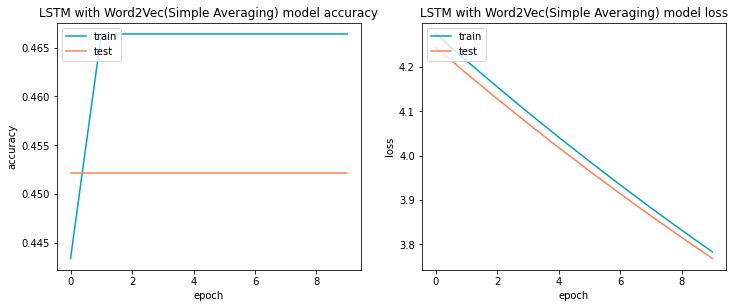

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)

In [ ]:
EvaluateModel(model, modelname, x_test, y_test, train_acc)

### <h4><font color='#00A0B8' font-family='Helvetica'>Word2Vec with TF-IDF Weighted Averaging</font></h4>

In [ ]:
embeddings_index = loadEmbeddingDictionary('word2vec-TfIdf')

Loaded 7666 word vectors.


In [ ]:
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Word2Vec(TF-IDF Weighted Averaging)'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words,numWords, 300, embeddings_index)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, labels)

Number of Samples: 8417
Number of Labels:  8417
Number of train Samples: 6733


In [ ]:
model = get_LSTM_Model(embedding_matrix.shape[0], 300, 300,embedding_matrix)

Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
54/54 - 7s - loss: 4.2741 - acc: 0.4489 - val_loss: 4.2436 - val_acc: 0.4521
Epoch 2/10
54/54 - 3s - loss: 4.2137 - acc: 0.4664 - val_loss: 4.1851 - val_acc: 0.4521
Epoch 3/10
54/54 - 3s - loss: 4.1547 - acc: 0.4664 - val_loss: 4.1277 - val_acc: 0.4521
Epoch 4/10
54/54 - 3s - loss: 4.0972 - acc: 0.4664 - val_loss: 4.0721 - val_acc: 0.4521
Epoch 5/10
54/54 - 3s - loss: 4.0411 - acc: 0.4664 - val_loss: 4.0177 - val_acc: 0.4521
Epoch 6/10
54/54 - 3s - loss: 3.9867 - acc: 0.4664 - val_loss: 3.9648 - val_acc: 0.4521
Epoch 7/10
54/54 - 3s - loss: 3.9335 - acc: 0.4664 - val_loss: 3.9136 - val_acc: 0.4521
Epoch 8/10
54/54 - 3s - loss: 3.8818 - acc: 0.4664 - val_loss: 3.8635 - val_acc: 0.4521
Epoch 9/10
54/54 - 3s - loss: 3.8314 - acc: 0.4664 - val_loss: 3.8148 - val_acc: 0.4521
Epoch 10/10
54/54 - 4s - loss: 3.7823 - acc: 0.4664 - val_loss: 3.7673 - val_acc: 0.4521


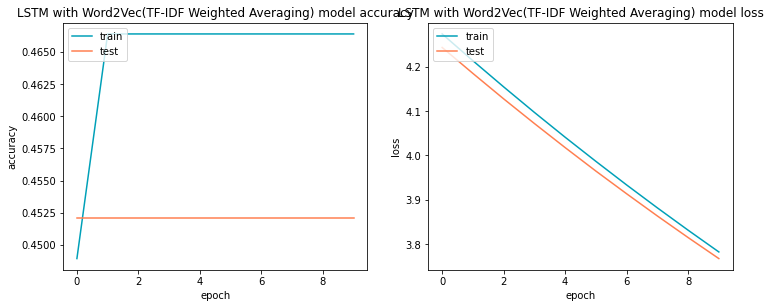

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)

In [ ]:
EvaluateModel(model, modelname, x_test, y_test, train_acc)

In [ ]:
del model, embeddings_index, embedding_matrix, X

### <h4><font color='#00A0B8' font-family='Helvetica'>Doc2Vec</font></h4>

In [ ]:
embeddings_index = loadEmbeddingDictionary('doc2vec')

Loaded 8417 word vectors.


In [ ]:
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Doc2Vec'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words,numWords, 300, embeddings_index)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, labels)

Number of Samples: 8417
Number of Labels:  8417
Number of train Samples: 6733


In [ ]:
model = get_LSTM_Model(embedding_matrix.shape[0], 300, 300,embedding_matrix)

Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
54/54 - 6s - loss: 4.2741 - acc: 0.4664 - val_loss: 4.2437 - val_acc: 0.4521
Epoch 2/10
54/54 - 3s - loss: 4.2135 - acc: 0.4664 - val_loss: 4.1849 - val_acc: 0.4521
Epoch 3/10
54/54 - 3s - loss: 4.1546 - acc: 0.4664 - val_loss: 4.1274 - val_acc: 0.4521
Epoch 4/10
54/54 - 4s - loss: 4.0972 - acc: 0.4664 - val_loss: 4.0719 - val_acc: 0.4521
Epoch 5/10
54/54 - 3s - loss: 4.0412 - acc: 0.4664 - val_loss: 4.0178 - val_acc: 0.4521
Epoch 6/10
54/54 - 3s - loss: 3.9866 - acc: 0.4664 - val_loss: 3.9649 - val_acc: 0.4521
Epoch 7/10
54/54 - 3s - loss: 3.9335 - acc: 0.4664 - val_loss: 3.9133 - val_acc: 0.4521
Epoch 8/10
54/54 - 3s - loss: 3.8818 - acc: 0.4664 - val_loss: 3.8633 - val_acc: 0.4521
Epoch 9/10
54/54 - 3s - loss: 3.8314 - acc: 0.4664 - val_loss: 3.8148 - val_acc: 0.4521
Epoch 10/10
54/54 - 3s - loss: 3.7822 - acc: 0.4664 - val_loss: 3.7673 - val_acc: 0.4521


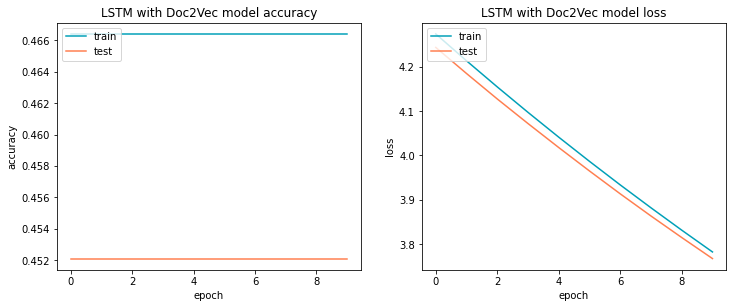

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)

In [ ]:
EvaluateModel(model, modelname, x_test, y_test, train_acc)

In [ ]:
del model, embeddings_index, embedding_matrix, X

### <h4><font color='#00A0B8' font-family='Helvetica'>Fast Text</font></h4>

In [ ]:
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with FastText'

In [ ]:
from gensim.models.fasttext import FastText
ft = FastText(size=300, window=50, min_count=1, sg=1)
ft.build_vocab(text)
ft.train(text, total_examples=ft.corpus_count, epochs=10)

In [ ]:
ft.corpus_count

8417

In [ ]:
bigger_list=[]
for i in text:
    li = list(i.split(" "))
    bigger_list.append(li) 

tokenizer = Tokenizer(num_words=numWords, lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(bigger_list)
sequences = tokenizer.texts_to_sequences(bigger_list)
X = pad_sequences(sequences, maxlen=maxlen)
labels = to_categorical(np.asarray(incidentsData['Assignment group']))

In [ ]:
embedding_matrix_ft = np.random.random((len(tokenizer.word_index) + 1, ft.vector_size))
pas = 0
for word,i in tokenizer.word_index.items():    
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        pas+=1

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, labels)

Number of Samples: 8417
Number of Labels:  8417
Number of train Samples: 6733


In [ ]:
model = get_LSTM_Model(len(tokenizer.word_index) + 1, 300, 300, embedding_matrix_ft,additional_mectrics=True)

Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          6189900   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 6,662,370
Trainable params: 472,470
Non-trainable params: 6,189,900
_________________________________________________________________


Epoch 1/10
54/54 - 7s - loss: 2.7223 - acc: 0.4590 - f1_m: 0.2690 - precision_m: 0.5284 - recall_m: 0.1970 - val_loss: 2.4952 - val_acc: 0.4521 - val_f1_m: 0.3867 - val_precision_m: 0.6358 - val_recall_m: 0.2788
Epoch 2/10
54/54 - 3s - loss: 2.3807 - acc: 0.5084 - f1_m: 0.4239 - precision_m: 0.6751 - recall_m: 0.3139 - val_loss: 2.3227 - val_acc: 0.5100 - val_f1_m: 0.3877 - val_precision_m: 0.6777 - val_recall_m: 0.2723
Epoch 3/10
54/54 - 4s - loss: 2.2632 - acc: 0.5204 - f1_m: 0.4323 - precision_m: 0.6917 - recall_m: 0.3224 - val_loss: 2.2197 - val_acc: 0.5137 - val_f1_m: 0.4776 - val_precision_m: 0.6217 - val_recall_m: 0.3885
Epoch 4/10
54/54 - 3s - loss: 2.1708 - acc: 0.5282 - f1_m: 0.4736 - precision_m: 0.7066 - recall_m: 0.3598 - val_loss: 2.1599 - val_acc: 0.5189 - val_f1_m: 0.4437 - val_precision_m: 0.7010 - val_recall_m: 0.3254
Epoch 5/10
54/54 - 3s - loss: 2.1226 - acc: 0.5319 - f1_m: 0.4761 - precision_m: 0.7144 - recall_m: 0.3613 - val_loss: 2.1363 - val_acc: 0.5122 - val_f1

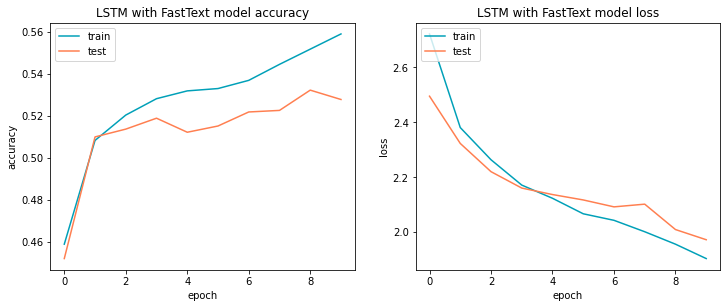

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)

In [ ]:
EvaluateModel(model, modelname, x_test, y_test, train_acc, additional_mectrics=True)

In [ ]:
del ft,model, embedding_matrix, X

In [ ]:
save_model_result()

### <h4><font color='#00A0B8' font-family='Helvetica'>Glove</font></h4>

In [ ]:
embeddings_index = loadEmbeddingDictionary('original_glove')

Loaded 400000 word vectors.


In [ ]:
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Glove'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words,numWords,300,embeddings_index)

In [ ]:
embedding_matrix.shape

(8418, 300)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, labels)

Number of Samples: 8417
Number of Labels:  8417
Number of train Samples: 6733


In [ ]:
model = get_LSTM_Model(embedding_matrix.shape[0],300, 300, embedding_matrix,additional_mectrics=True)

Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
54/54 - 7s - loss: 2.6777 - acc: 0.4944 - f1_m: 0.3588 - precision_m: 0.5355 - recall_m: 0.2775 - val_loss: 2.1403 - val_acc: 0.5197 - val_f1_m: 0.4926 - val_precision_m: 0.7483 - val_recall_m: 0.3678
Epoch 2/10
54/54 - 3s - loss: 1.9754 - acc: 0.5498 - f1_m: 0.5320 - precision_m: 0.7616 - recall_m: 0.4127 - val_loss: 1.9285 - val_acc: 0.5449 - val_f1_m: 0.5131 - val_precision_m: 0.7381 - val_recall_m: 0.3939
Epoch 3/10
54/54 - 3s - loss: 1.7739 - acc: 0.5823 - f1_m: 0.5625 - precision_m: 0.7798 - recall_m: 0.4415 - val_loss: 1.7916 - val_acc: 0.5494 - val_f1_m: 0.5308 - val_precision_m: 0.7437 - val_recall_m: 0.4132
Epoch 4/10
54/54 - 3s - loss: 1.6260 - acc: 0.5999 - f1_m: 0.5926 - precision_m: 0.7999 - recall_m: 0.4725 - val_loss: 1.6860 - val_acc: 0.5828 - val_f1_m: 0.5326 - val_precision_m: 0.8075 - val_recall_m: 0.3981
Epoch 5/10
54/54 - 3s - loss: 1.5053 - acc: 0.6194 - f1_m: 0.6103 - precision_m: 0.8202 - recall_m: 0.4878 - val_loss: 1.6380 - val_acc: 0.5768 - val_f1

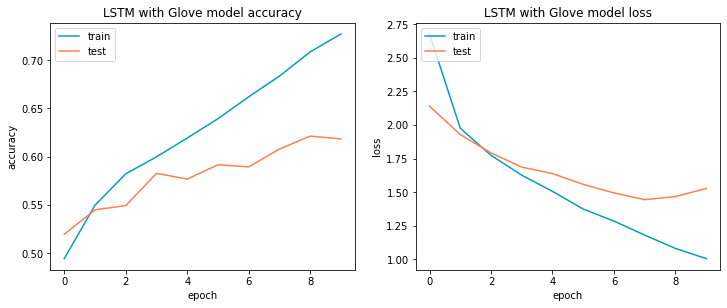

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)

In [ ]:
EvaluateModel(model, modelname, x_test, y_test,train_acc,additional_mectrics=True)

In [ ]:
del model, embeddings_index, embedding_matrix, X

In [ ]:
resultsDf

Model  Train_Acc  Test_Acc  Precision    Recall  F1_Score
0  LSTM with Glove   0.922733  0.969869   0.972889  0.966922  0.969849

### <h4><font color='#00A0B8' font-family='Helvetica'>Glove with Over sampling</font></h4>

In [ ]:
embeddings_index = loadEmbeddingDictionary('original_glove')
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Glove with OverSampling'

X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words_up_sample, numWords,300,embeddings_index, oversampling=True)

x_train, x_test, y_train, y_test = splitData(X, labels)

model = get_LSTM_Model(embedding_matrix.shape[0],300, 300, embedding_matrix,additional_mectrics=True)

Loaded 400000 word vectors.
Number of Samples: 147525
Number of Labels:  147525
Number of train Samples: 118020
Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
________________________________________________________

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)
EvaluateModel(model, modelname, x_test, y_test,train_acc,additional_mectrics=True)

In [ ]:
y_train.shape

(118020, 74)

In [ ]:
del model, embeddings_index, embedding_matrix, X

### <h4><font color='#00A0B8' font-family='Helvetica'>Glove with  SMOTE</font></h4>
Since we are having 73 classes and 8417 samples in the training set. so on average each sample should have atleast 115 samples per class. However, our dataset is extremely imbalanced.  There are classes with only one samples and  the number of neighbors is 6. So, we cannot use only Synthetic Minority Oversampling Technique (SMOTE). so we will use Random oversampling and then apply SMOTE



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
embeddings_index = loadEmbeddingDictionary('original_glove')
maxlen = 300
numWords=8417
epochs = 10
modelname = 'LSTM with Glove with SMOTE'

Loaded 400000 word vectors.


In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words, numWords,300,embeddings_index, oversampling=False)

ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(X, labels)

smote = SMOTE(random_state=777,k_neighbors=5)
X, y = smote.fit_sample(X_ROS, y_ROS)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, y)
model = get_LSTM_Model(embedding_matrix.shape[0],300, 300, embedding_matrix,additional_mectrics=True)

Number of Samples: 291116
Number of Labels:  291116
Number of train Samples: 232892
Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
1864/1864 - 125s - loss: 0.7502 - acc: 0.8016 - f1_m: 0.7887 - precision_m: 0.9251 - recall_m: 0.7143 - val_loss: 0.2088 - val_acc: 0.9370 - val_f1_m: 0.9384 - val_precision_m: 0.9671 - val_recall_m: 0.9117
Epoch 2/10
1864/1864 - 115s - loss: 0.1948 - acc: 0.9407 - f1_m: 0.9418 - precision_m: 0.9618 - recall_m: 0.9230 - val_loss: 0.1213 - val_acc: 0.9638 - val_f1_m: 0.9635 - val_precision_m: 0.9696 - val_recall_m: 0.9576
Epoch 3/10
1864/1864 - 116s - loss: 0.1278 - acc: 0.9594 - f1_m: 0.9601 - precision_m: 0.9713 - recall_m: 0.9492 - val_loss: 0.1017 - val_acc: 0.9677 - val_f1_m: 0.9681 - val_precision_m: 0.9738 - val_recall_m: 0.9626
Epoch 4/10
1864/1864 - 115s - loss: 0.1016 - acc: 0.9670 - f1_m: 0.9675 - precision_m: 0.9761 - recall_m: 0.9591 - val_loss: 0.0737 - val_acc: 0.9752 - val_f1_m: 0.9754 - val_precision_m: 0.9780 - val_recall_m: 0.9728
Epoch 5/10
1864/1864 - 115s - loss: 0.0829 - acc: 0.9721 - f1_m: 0.9725 - precision_m: 0.9795 - recall_m: 0.9657 - val_loss: 0.0

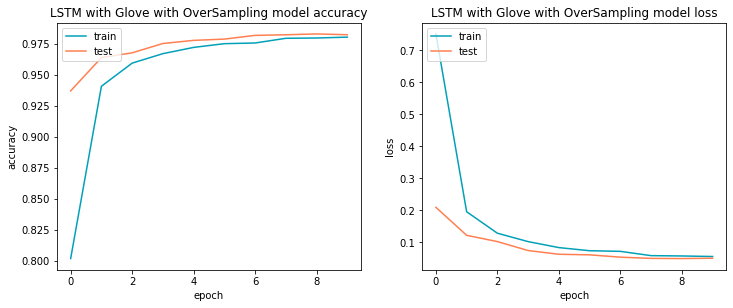

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)
EvaluateModel(model, modelname, x_test, y_test,train_acc,additional_mectrics=True)

## <h4><font color='#00A0B8' font-family='Helvetica'>2.RNN Model</font></h4>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
embeddings_index = loadEmbeddingDictionary('original_glove')
maxlen = 300
numWords=8417
epochs = 10
modelname = 'RNN with Glove with SMOTE'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words, numWords,300,embeddings_index, oversampling=False)

In [ ]:
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(X, labels)

smote = SMOTE(random_state=777,k_neighbors=5)
X, y = smote.fit_sample(X_ROS, y_ROS)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, y)
model = get_RNN_Model(embedding_matrix.shape[0],300, 300, embedding_matrix,additional_mectrics=True)

Number of Samples: 291116
Number of Labels:  291116
Number of train Samples: 232892
Model: "RNNSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
Conv1D-1 (Conv1D)            (None, 291, 100)          300100    
_________________________________________________________________
MaxPooling1D-1 (MaxPooling1D (None, 145, 100)          0         
_________________________________________________________________
Dropout-1 (Dropout)          (None, 145, 100)          0         
_________________________________________________________________
Conv1D-2 (Conv1D)            (None, 136, 100)          100100    
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 68, 100)           0         
___________________________________

Epoch 1/10
1864/1864 - 69s - loss: 0.1782 - acc: 0.9420 - f1_m: 0.9455 - precision_m: 0.9670 - recall_m: 0.9251 - val_loss: 0.1142 - val_acc: 0.9603 - val_f1_m: 0.9650 - val_precision_m: 0.9813 - val_recall_m: 0.9494
Epoch 2/10
1864/1864 - 68s - loss: 0.1373 - acc: 0.9532 - f1_m: 0.9567 - precision_m: 0.9741 - recall_m: 0.9401 - val_loss: 0.0959 - val_acc: 0.9664 - val_f1_m: 0.9699 - val_precision_m: 0.9848 - val_recall_m: 0.9556
Epoch 3/10
1864/1864 - 67s - loss: 0.1215 - acc: 0.9585 - f1_m: 0.9614 - precision_m: 0.9770 - recall_m: 0.9464 - val_loss: 0.0955 - val_acc: 0.9668 - val_f1_m: 0.9701 - val_precision_m: 0.9866 - val_recall_m: 0.9543
Epoch 4/10
1864/1864 - 67s - loss: 0.1106 - acc: 0.9610 - f1_m: 0.9645 - precision_m: 0.9800 - recall_m: 0.9496 - val_loss: 0.0920 - val_acc: 0.9691 - val_f1_m: 0.9726 - val_precision_m: 0.9886 - val_recall_m: 0.9573
Epoch 5/10
1864/1864 - 67s - loss: 0.1036 - acc: 0.9632 - f1_m: 0.9667 - precision_m: 0.9817 - recall_m: 0.9523 - val_loss: 0.0840 -

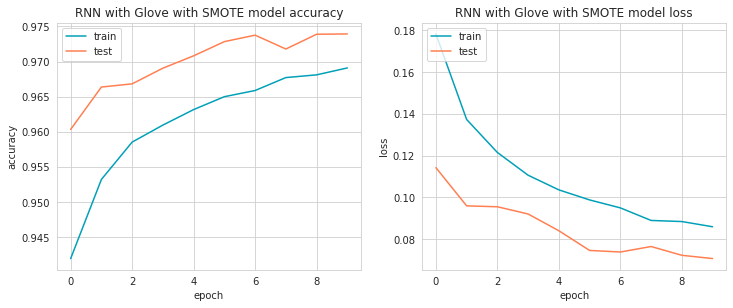

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)
EvaluateModel(model, modelname, x_test, y_test,train_acc,additional_mectrics=True)

In [ ]:
del model, X

## <h4><font color='#00A0B8' font-family='Helvetica'>3.GRU Model</font></h4>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [ ]:
embeddings_index = loadEmbeddingDictionary('original_glove')
maxlen = 300
numWords=8417
epochs = 10
modelname = 'GRU with Glove with SMOTE'

In [ ]:
X, labels, embedding_matrix = getVariables_and_EmbeddingMatrix(doc_words, numWords,300,embeddings_index, oversampling=False)

In [ ]:
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(X, labels)

In [ ]:
smote = SMOTE(random_state=777,k_neighbors=5)
X, y = smote.fit_sample(X_ROS, y_ROS)

In [ ]:
x_train, x_test, y_train, y_test = splitData(X, y)
model = get_LSTM_Model(embedding_matrix.shape[0],300, 300, embedding_matrix,additional_mectrics=True)

Number of Samples: 291116
Number of Labels:  291116
Number of train Samples: 232892
Model: "LSTMSequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 300, 300)          2525400   
_________________________________________________________________
BidirectionalLSTM (Bidirecti (None, 256)               439296    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Dense (Dense)                (None, 100)               25700     
_________________________________________________________________
DenseOutput (Dense)          (None, 74)                7474      
Total params: 2,997,870
Trainable params: 472,470
Non-trainable params: 2,525,400
_________________________________________________________________


Epoch 1/10
1864/1864 - 125s - loss: 0.7420 - acc: 0.8029 - f1_m: 0.7918 - precision_m: 0.9255 - recall_m: 0.7176 - val_loss: 0.2249 - val_acc: 0.9326 - val_f1_m: 0.9332 - val_precision_m: 0.9651 - val_recall_m: 0.9035
Epoch 2/10
1864/1864 - 121s - loss: 0.1894 - acc: 0.9420 - f1_m: 0.9430 - precision_m: 0.9631 - recall_m: 0.9239 - val_loss: 0.1197 - val_acc: 0.9618 - val_f1_m: 0.9633 - val_precision_m: 0.9797 - val_recall_m: 0.9477
Epoch 3/10
1864/1864 - 121s - loss: 0.1281 - acc: 0.9590 - f1_m: 0.9598 - precision_m: 0.9706 - recall_m: 0.9493 - val_loss: 0.0850 - val_acc: 0.9718 - val_f1_m: 0.9727 - val_precision_m: 0.9845 - val_recall_m: 0.9613
Epoch 4/10
1864/1864 - 121s - loss: 0.0982 - acc: 0.9674 - f1_m: 0.9679 - precision_m: 0.9759 - recall_m: 0.9600 - val_loss: 0.0691 - val_acc: 0.9742 - val_f1_m: 0.9756 - val_precision_m: 0.9868 - val_recall_m: 0.9647
Epoch 5/10
1864/1864 - 120s - loss: 0.0880 - acc: 0.9707 - f1_m: 0.9714 - precision_m: 0.9785 - recall_m: 0.9643 - val_loss: 0.0

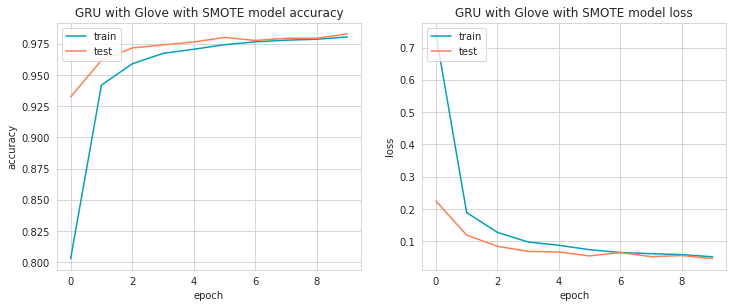

In [ ]:
train_acc = TrainModel(model, modelname,x_train,y_train, epochs=10,batch_size=100, verbose=2)
EvaluateModel(model, modelname, x_test, y_test,train_acc,additional_mectrics=True)

In [ ]:
save_model_result(overwrite=True)

# <h3><font color='#00A0B8' font-family='Helvetica'>**The Pretrained Models for Text Classification**</font></h3>

With transfer learning we are now able to use a pre-existing model built on a huge dataset and tune it to achieve other tasks on a different dataset.

Transfer learning, and pretrained models, have 2 major advantages:

*   It has reduced the cost of training a new deep learning model every time
*   These datasets meet industry-accepted standards, and thus the pretrained models have already been vetted on the quality aspect


### <h4><font color='#00A0B8' font-family='Helvetica'>**1. XLNet**</font></h4>
Google’s latest model, XLNet achieved State-of-the-Art (SOTA) performance on the major NLP tasks such as Text Classification, Sentiment Analysis, Question Answering, and Natural Language Inference along with the essential GLUE benchmark for English. 

Lets try to implement XLNet for our classification problem.The core ideas behind XLNet are:

*  Generalized Autoregressive Pretraining for Language Understanding
*  The Transformer-XL

Autoregressive modeling is used to predict the next word using the context words occurring either before or after the missing word in question. However, we can’t process both the forward and backward directions at the same time.

XLNet proposes a technique called **Permutation Language Modeling** during the pre-training phase. This technique uses permutations to generate information from both the forward and backward directions simultaneously.

Transformer architecture has been a game-changer. XLNet uses **Transformer XL**. And transformers are an alternative to recurrent neural networks (RNN) in the sense that they allowed non-adjacent tokens to be processed together as well. This improved understanding of long-distance relations in text. Transformer-XL is basically an enhanced version by adding two components:

*  A recurrence at specific segments which gives the context between 2 sequences
*  A relative positional embedding which contains information on the similarity between 2 tokens


Here, we will use the excellent library [transformers](https://github.com/huggingface/pytorch-transformers) which is deployed by [Huggingface](https://github.com/huggingface), this library contains some state-of-the-art pre-trained models for Natural Language Processing

The process of doing text classification with XLNet contains 4 steps:
1. Load data
2. Set data into training embeddings
3. Train model
4. Evaluate model performance

In [ ]:
!pip install transformers -q
% pip install sentencepiece
!pip install torch

In [ ]:
from transformers import (XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer)
import torch
from tqdm import tqdm,trange
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

import pandas as pd
import math
import numpy as np
from sklearn.metrics import classification_report
import torch.nn.functional as F

In [ ]:
# Check library version
!pip list | grep -E 'transformers|torch|Keras'

Keras                         2.4.3          
Keras-Preprocessing           1.1.2          
torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    
transformers                  4.2.2          


####<font color='#00A0B8' font-family='Helvetica'>**1.Load Data**</font>

In [ ]:
text = TextPreprocessor(n_jobs=-1).transform(incidentsData_Others_upsample['New_Description'])

In [ ]:
# Get sentence data
sentences = text.to_list()
sentences[0]

'login issue verify user detail employee manager check user ad reset password advise user login check caller confirm able login issue resolve'

In [ ]:
labels = incidentsData_Others_upsample['Assignment group'].to_list()

In [ ]:
print(labels[0])

GRP_0


In [ ]:
names = incidentsData_Others_upsample['Assignment group'].unique().tolist()
grpID=[]
for grp in names:
  grpID.append(int(grp.replace("GRP_","")))

grp_mapping = dict(zip(grpID,names))

tag2idx = grp_mapping
# Mapping index to name
tag2name={tag2idx[key] : key for key in tag2idx.keys()}

#####<font color='#00A0B8' font-family='Helvetica'>Make training data</font>

Make raw data into trainable data for XLNet, including:

*  Set gpu environment
*  Load tokenizer and tokenize
*  Set 3 embedding, token embedding, mask word embedding, segmentation embedding
*  Split data set into train and validate, then send them to dataloader

<font color='#00A0B8' font-family='Helvetica'>Set up gpu environment</font>

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
n_gpu

1

<font color='#00A0B8' font-family='Helvetica'>Load tokenizer</font><br/>
For this we will need  to install sentencepiece. (*if in case of issue with next line we need to restart kernel and rerun application.*) <br/>

please download vocabulary from "https://s3.amazonaws.com/models.huggingface.co/bert/xlnet-base-cased-spiece.model"

In [ ]:
vocabulary =  project_path + 'Embeddings/xlnet/xlnet-base-cased-spiece.model'

In [ ]:
max_len  = 100

In [ ]:
tokenizer = XLNetTokenizer(vocab_file=vocabulary,do_lower_case=False)

####<font color='#00A0B8' font-family='Helvetica'>**2.Set data into training embedding**</font>
After we get the data, we need to set the text into 3 kinds of embeddings:
- Token embedding
- Mask word embedding
- Segmentation embedding

In [ ]:
max_len  = 100

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A   = 0
SEG_ID_B   = 1
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

UNK_ID = tokenizer.encode("<unk>")[0]
CLS_ID = tokenizer.encode("<cls>")[0]
SEP_ID = tokenizer.encode("<sep>")[0]
MASK_ID = tokenizer.encode("<mask>")[0]
EOD_ID = tokenizer.encode("<eod>")[0]

for i,sentence in enumerate(sentences):
    # Tokenize sentence to token id list
    tokens_a = tokenizer.encode(sentence)
    
    # Trim the len of text
    if(len(tokens_a)>max_len-2):
        tokens_a = tokens_a[:max_len-2]
        
        
    tokens = []
    segment_ids = []
    
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(SEG_ID_A)
        
    # Add <sep> token 
    tokens.append(SEP_ID)
    segment_ids.append(SEG_ID_A)
    
    
    # Add <cls> token
    tokens.append(CLS_ID)
    segment_ids.append(SEG_ID_CLS)
    
    input_ids = tokens
    
    # The mask has 0 for real tokens and 1 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [0] * len(input_ids)

    # Zero-pad up to the sequence length at fornt
    if len(input_ids) < max_len:
        delta_len = max_len - len(input_ids)
        input_ids = [0] * delta_len + input_ids
        input_mask = [1] * delta_len + input_mask
        segment_ids = [SEG_ID_PAD] * delta_len + segment_ids

    assert len(input_ids) == max_len
    assert len(input_mask) == max_len
    assert len(segment_ids) == max_len
    
    full_input_ids.append(input_ids)
    full_input_masks.append(input_mask)
    full_segment_ids.append(segment_ids)
    
    if 3 > i:
        print("No.:%d"%(i))
        print("sentence: %s"%(sentence))
        print("input_ids:%s"%(input_ids))
        print("attention_masks:%s"%(input_mask))
        print("segment_ids:%s"%(segment_ids))
        print("\n")

No.:0
sentence: login issue verify user detail employee manager check user ad reset password advise user login check caller confirm able login issue resolve
input_ids:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11178, 671, 9948, 1930, 4089, 3820, 1416, 1180, 1930, 24, 66, 16263, 5886, 8488, 1930, 11178, 1180, 18380, 4775, 551, 11178, 671, 4885, 4, 3, 7739, 7739]
attention_masks:[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
segment_ids:[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

<font color='#00A0B8' font-family='Helvetica'>Set label embedding</font>

In [ ]:
# Make label into id
tags = [tag2name[str(lab)] for lab in labels]
print(tags[0])

0


<font color='#00A0B8' font-family='Helvetica'>Split data into train and validate</font>

70% for training, 30% for validation


In [ ]:
tr_inputs, val_inputs, tr_tags, val_tags,tr_masks, val_masks,tr_segs, val_segs = train_test_split(full_input_ids, tags,full_input_masks,full_segment_ids, 
                                                            random_state=4, test_size=0.3)

In [ ]:
len(tr_inputs),len(val_inputs),len(tr_segs),len(val_segs)

(103267, 44258, 103267, 44258)

<font color='#00A0B8' font-family='Helvetica'>Set data into tensor</font>


In [ ]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)

tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)

tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

tr_segs = torch.tensor(tr_segs)
val_segs = torch.tensor(val_segs)

<font color='#00A0B8' font-family='Helvetica'>Put data into data loader</font>

In [ ]:
# Set batch num
batch_num = 64

In [ ]:
# Set token embedding, attention embedding, segment embedding
train_data = TensorDataset(tr_inputs, tr_masks,tr_segs, tr_tags)
train_sampler = RandomSampler(train_data)

# Drop last can make batch training better for the last one
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_num,drop_last=True)

valid_data = TensorDataset(val_inputs, val_masks,val_segs, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_num)

####<font color='#00A0B8' font-family='Helvetica'>**3.Train model**</font>

When using transform learning like XLNet, the process of training a new model with downstream data called “fine-tuning”, for this we need to  choose one of the XLNet pre-trained model and use our own data to update the model’s parameter to fix our downstream NLP task.

XLNet have 2 kinds of model, base cased model and large cased model. Here, we will choose XLNet base cased model for fine-tuning new model. The large version model is a bigger model than base model, which has better performance, but need more computing power and times. 



In [ ]:

# Load XLNet model
# In this document, contain confg(txt) and weight(bin) files
model_file_address = 'xlnet-base-cased' 

# Download model from "https://s3.amazonaws.com/models.huggingface.co/bert/xlnet-base-cased-pytorch_model.bin"
# Download model from "https://s3.amazonaws.com/models.huggingface.co/bert/xlnet-base-cased-config.json"

In [ ]:
model = XLNetForSequenceClassification.from_pretrained(model_file_address,num_labels=len(tag2idx))

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
model;

In [ ]:
# Set model to GPU,if you are using GPU machine
model.to(device);

In [ ]:
# Add multi GPU support
if n_gpu >1:
    model = torch.nn.DataParallel(model)

In [ ]:
# Set epoch and grad max num
epochs = 5
max_grad_norm = 1.0

In [ ]:
# Cacluate train optimiazaion num
num_train_optimization_steps = int( math.ceil(len(tr_inputs) / batch_num) / 1) * epochs

<font color='#00A0B8' font-family='Helvetica'>Set fine tuning method</font>


In [ ]:
# True: fine tuning all the layers 
# False: only fine tuning the classifier layers
# Since XLNet in 'pytorch_transformer' did not contian classifier layers
# FULL_FINETUNING = True need to set True
FULL_FINETUNING = True

In [ ]:
if FULL_FINETUNING:
    # Fine tune model all layer parameters
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    # Only fine tune classifier parameters
    param_optimizer = list(model.classifier.named_parameters()) 
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = Adam(optimizer_grouped_parameters, lr=3e-5)

In [ ]:
# TRAIN loop
model.train();

In [ ]:
print("***** Running training *****")
print("  Num examples = %d"%(len(tr_inputs)))
print("  Batch size = %d"%(batch_num))
print("  Num steps = %d"%(num_train_optimization_steps))
for _ in trange(epochs,desc="Epoch"):
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_segs,b_labels = batch
        
        # forward pass
        outputs = model(input_ids =b_input_ids,token_type_ids=b_segs, input_mask = b_input_mask,labels=b_labels)
        loss, logits = outputs[:2]
        if n_gpu>1:
            # When multi gpu, average it
            loss = loss.mean()
        
        # backward pass
        loss.backward()
        
        # track train loss
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1
        
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        
        # update parameters
        optimizer.step()
        optimizer.zero_grad()
        
    # print train loss per epoch
    print("Train loss: {}".format(tr_loss/nb_tr_steps))

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 103267
  Batch size = 64
  Num steps = 8070


Epoch:  20%|██        | 1/5 [38:31<2:34:04, 2311.15s/it]

Train loss: 0.7788618238018081


Epoch:  40%|████      | 2/5 [1:17:03<1:55:34, 2311.63s/it]

Train loss: 0.0903384218618022


Epoch:  60%|██████    | 3/5 [1:55:36<1:17:03, 2311.83s/it]

Train loss: 0.056720816845611845


Epoch:  80%|████████  | 4/5 [2:34:08<38:32, 2312.07s/it]  

Train loss: 0.04476985447167928


In [ ]:
print(tr_loss)

170.39712598560436


In [ ]:
print(nb_tr_steps)

1613


In [ ]:
tr_loss = 72.2137752628185

In [ ]:
tr_loss

72.2137752628185

#####<font color='#00A0B8' font-family='Helvetica'>Save model</font>


In [ ]:
xlnet_out_address = project_path + 'Embeddings/xlnet/models/xlnet_out_model/tc04'

In [ ]:
# Make dir if not exits
if not os.path.exists(xlnet_out_address):
        os.makedirs(xlnet_out_address)

In [ ]:
# Save a trained model, configuration and tokenizer
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self

In [ ]:
# If we save using the predefined names, we can load using `from_pretrained`
output_model_file = os.path.join(xlnet_out_address, "pytorch_model.bin")
output_config_file = os.path.join(xlnet_out_address, "config.json")

In [ ]:
# Save model into file
torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(xlnet_out_address)

('/content/drive/My Drive/Colab Notebooks/Capstone/Embeddings/xlnet/models/xlnet_out_model/tc04/spiece.model',)

####<font color='#00A0B8' font-family='Helvetica'>**4.Evaluate model performance**</font>

#####<font color='#00A0B8' font-family='Helvetica'>Load model</font>

In [ ]:
model = XLNetForSequenceClassification.from_pretrained(xlnet_out_address,num_labels=len(tag2idx))

In [ ]:
# Set model to GPU
model.to(device);

In [ ]:
if n_gpu >1:
    model = torch.nn.DataParallel(model)

#####<font color='#00A0B8' font-family='Helvetica'>Eval model</font>

In [ ]:
# Evalue loop
model.eval();

In [ ]:
# Set acc funtion
def accuracy(out, labels):
    outputs = np.argmax(out, axis=1)
    return np.sum(outputs == labels)

In [ ]:
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

y_true = []
y_predict = []
print("***** Running evaluation *****")
print("  Num examples ={}".format(len(val_inputs)))
print("  Batch size = {}".format(batch_num))
for step, batch in enumerate(valid_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_segs,b_labels = batch
    
    with torch.no_grad():
        outputs = model(input_ids =b_input_ids,token_type_ids=b_segs, input_mask = b_input_mask,labels=b_labels)
        tmp_eval_loss, logits = outputs[:2]
    
    # Get textclassification predict result
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_eval_accuracy = accuracy(logits, label_ids)
    
    # Save predict and real label reuslt for analyze
    for predict in np.argmax(logits, axis=1):
        y_predict.append(predict)
        
    for real_result in label_ids.tolist():
        y_true.append(real_result)

    
    eval_loss += tmp_eval_loss.mean().item()
    eval_accuracy += tmp_eval_accuracy
   
    nb_eval_steps += 1
    
    
eval_loss = eval_loss / nb_eval_steps
eval_accuracy = eval_accuracy / len(val_inputs)
loss = tr_loss/nb_tr_steps 
result = {'eval_loss': eval_loss,
                  'eval_accuracy': eval_accuracy,
                  'loss': loss}
report = classification_report(y_pred=np.array(y_predict),y_true=np.array(y_true))

# Save the report into file
output_eval_file = os.path.join(xlnet_out_address, "eval_results.txt")
with open(output_eval_file, "w") as writer:
    print("***** Eval results *****")
    for key in sorted(result.keys()):
        print("  %s = %s"%(key, str(result[key])))
        writer.write("%s = %s\n" % (key, str(result[key])))
        
    print(report)
    writer.write("\n\n")  
    writer.write(report)

***** Running evaluation *****
  Num examples =44258
  Batch size = 64
***** Eval results *****
  eval_accuracy = 0.9857652853721361
  eval_loss = 0.05169076022105406
  loss = 0.04476985447167917
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1151
           1       0.99      1.00      1.00       605
           2       0.96      0.97      0.97       595
           3       0.96      0.99      0.98       582
           4       0.98      1.00      0.99       573
           5       0.97      1.00      0.99       591
           6       0.98      1.00      0.99       590
           7       0.99      1.00      0.99       604
           8       0.99      0.92      0.95       575
           9       0.99      0.99      0.99       586
          10       0.99      1.00      1.00       574
          11       1.00      1.00      1.00       585
          12       0.99      0.96      0.98       567
          13       0.98      1.00      0.99    

In [ ]:
eval_accuracy 

0.9857652853721361

In [ ]:
# From above report
update_model_score('XLNet with Over-Sampling','-',eval_accuracy,0.99,0.99,0.98)

New_ID  ...     F1_Score
0      1.0  ...  0.684337867
1      2.0  ...  0.709225897
2      3.0  ...  0.701299768
3      4.0  ...  0.586800499
4      5.0  ...  0.665463414
5      6.0  ...  0.595234563
6      7.0  ...  0.643824735
7      8.0  ...  0.672999272
8      9.0  ...  0.670941162
9     10.0  ...  0.625110475
10    11.0  ...  0.983393152
11    12.0  ...  0.989726036
12    13.0  ...            -
13    14.0  ...            -
14    15.0  ...            -
15    16.0  ...  0.495131284
16    17.0  ...   0.64677012
17    18.0  ...  0.984238148
18    19.0  ...  0.976669252
19    20.0  ...  0.982949674
20    21.0  ...         0.98
21    22.0  ...            -
22    23.0  ...            -
0      NaN  ...         0.98
0      NaN  ...         0.98

[25 rows x 7 columns]

In [ ]:
resultsDf

Model Train_Acc  Test_Acc  Precision  Recall  F1_Score
0  XLNet with Over-Sampling         -  0.985268       0.99    0.99      0.98

### <h4><font color='#00A0B8' font-family='Helvetica'>**2. BERT**</font></h4>

#### <h4><font color='#00A0B8' font-family='Helvetica'>**BERT Common Functions**</font></h4>

In [32]:
!pip install transformers -q
!pip install torch

     |████████████████████████████████| 1.8MB 16.8MB/s 
     |████████████████████████████████| 2.9MB 50.7MB/s 
     |████████████████████████████████| 890kB 47.7MB/s 


In [33]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [34]:
from sklearn.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
    
def accuracy(preds, labels):
    outputs = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(outputs == labels_flat)

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [35]:
def get_transormedX_and_labels(df):
  all_labels = df['Assignment group'].unique()

  label_dict = {}
  for index, label in enumerate(all_labels):
      label_dict[label] = index
  label_dict

  df['label'] = df['Assignment group'].replace(label_dict)
  X = TextPreprocessor(n_jobs=-1).transform(df['New_Description'])
  return df, X, label_dict

In [36]:
def evaluate(dataloader_val):

    model.eval()    
    loss_val_total = 0
    predictions, true_vals = [], []
    total_eval_accuracy = 0
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

     # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(dataloader_val)
  
            
    return loss_val_avg, predictions, true_vals, avg_val_accuracy

In [37]:
from transformers import BertModel, BertConfig,BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset
from tqdm import tqdm,trange
def get_train_val_dataset(df):
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                            do_lower_case=True)
                                            
  encoded_data_train = tokenizer.batch_encode_plus(
      df[df.data_type=='train'].New_Description.values, 
      add_special_tokens=True, 
      return_attention_mask=True, 
      padding='longest',
      max_length=256, 
      return_tensors='pt',truncation=True
  )

  encoded_data_val = tokenizer.batch_encode_plus(
      df[df.data_type=='val'].New_Description.values, 
      add_special_tokens=True, 
      return_attention_mask=True, 
      padding='longest',
      max_length=256, 
      return_tensors='pt',truncation=True
  )


  input_ids_train = encoded_data_train['input_ids']
  attention_masks_train = encoded_data_train['attention_mask']
  labels_train = torch.tensor(df[df.data_type=='train'].label.values)

  input_ids_val = encoded_data_val['input_ids']
  attention_masks_val = encoded_data_val['attention_mask']
  labels_val = torch.tensor(df[df.data_type=='val'].label.values)

  dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
  dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
  return dataset_train, dataset_val

#### <h4><font color='#00A0B8' font-family='Helvetica'>**BERT Model**</font></h4>

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


df = incidentsData.copy()

In [ ]:
# Lets find out Groups with ticket count only 1, for such groups we cant split the data set in a stratified fashion
minor_df = df.groupby('Assignment group').filter(lambda x: len(x) <= 1)

In [ ]:
minor_df

Short description  ...                             Description_pos_tagged
401                          need access to erp kp06789  ...  [(need, NN), (access, NN), (to, TO), (erp, VB)...
3036  (srvlavpwdrprd01.company.company.com) is not r...  ...  [((, (), (srvlavpwdrprd01.company.company.com,...
3628  r: ticket_no1402627 change in report zsdslsum ...  ...  [(r, NN), (:, :), (ticket_no1402627, NN), (cha...
5154                        unable to complete forecast  ...  [(unable, JJ), (to, TO), (complete, VB), (fore...
6401          a link on an e-mail says i am "forbidden"  ...  [(a, DT), (link, NN), (on, IN), (an, DT), (e-m...
8197                            oneteam sso not working  ...  [(oneteam, NN), (sso, NN), (not, RB), (working...

[6 rows x 6 columns]

In [ ]:
df.shape

(8417, 6)

In [ ]:
# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample

incidentsData_upsampled = minor_df[0:0]

# Upsample minority class
for grp in minor_df['Assignment group'].unique():
    incidentsData_Group = df[df['Assignment group'] == grp]
    resampled = resample(incidentsData_Group, 
                         replace=True, # sample with replacement
                         n_samples=2, 
                         random_state=123) # reproducible results
    
    incidentsData_upsampled = incidentsData_upsampled.append(resampled)

frames = [df,incidentsData_upsampled]
df = pd.concat(frames)

In [ ]:
df, X = get_transormedX_and_labels(df)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X.index.values,
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[x_train, 'data_type'] = 'train'
df.loc[x_test, 'data_type'] = 'val'

In [ ]:
dataset_train, dataset_val = get_train_val_dataset(df)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=2e-5, 
                  eps=1e-8)
                  
epochs = 5
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(),    project_path + f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy: {avg_val_accuracy}')
    

In [ ]:

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load(project_path + 'data_volume/finetuned_BERT_epoch_5.model', map_location=torch.device('cpu')))

avg_val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
print("  Validation Loss: {0:.2f}".format(avg_val_loss))
# accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  Accuracy: 0.69
  Validation Loss: 1.61


In [ ]:
# From above report
update_model_score('BERT with Original Data','-',0.69,'-', '-','-')

New_ID  ...            F1_Score
0      1.0  ...  0.6843378674202307
1      2.0  ...  0.7092258967271996
2      3.0  ...  0.5868004986259479
3      4.0  ...   0.701299767911979
4      5.0  ...  0.6654634141813385
5      6.0  ...  0.5868004986259479
6      7.0  ...   0.701299767911979
7      8.0  ...  0.6654634141813385
8      9.0  ...  0.5952345627797491
9     10.0  ...  0.6438247353664897
10    11.0  ...  0.6729992724705817
11    12.0  ...  0.6709411621876901
12    13.0  ...   0.625110474835671
13    14.0  ...  0.9833931524574336
14    15.0  ...  0.9897260359951939
15    16.0  ...                   -
16    17.0  ...                   -
17    18.0  ...                   -
18    19.0  ...  0.4951312839984894
19    20.0  ...  0.6467701196670532
20    21.0  ...  0.9842381477355957
21    22.0  ...                0.98
0      NaN  ...                   -

[23 rows x 7 columns]

#### <h4><font color='#00A0B8' font-family='Helvetica'>**2. BERT using up sampling for training**</font></h4>

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
df = incidentsData_Others_upsample.copy()

In [ ]:
df, X, label_dict  = get_transormedX_and_labels(df)

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X.index.values,
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[x_train, 'data_type'] = 'train'
df.loc[x_test, 'data_type'] = 'val'

dataset_train, dataset_val = get_train_val_dataset(df)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

##### <h4><font color='#00A0B8' font-family='Helvetica'>**Model Training**</font></h4>

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(),    project_path + f'data_volume/over_finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy: {avg_val_accuracy}')


Streaming output truncated to the last 5000 lines.
Epoch 1:  32%|███▏      | 13177/41242 [42:45<1:32:42,  5.05it/s, training_loss=0.027]

Buffered data was truncated after reaching the output size limit.

##### <h4><font color='#00A0B8' font-family='Helvetica'>**Test model with original data**</font></h4>

In [ ]:
df = incidentsData.copy()

In [ ]:
# Lets find out Groups with ticket count only 1, for such groups we cant split the data set in a stratified fashion
minor_df = df.groupby('Assignment group').filter(lambda x: len(x) <= 1)

# Treat the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample
incidentsData_upsampled = minor_df[0:0]

# Upsample minority class
for grp in minor_df['Assignment group'].unique():
    incidentsData_Group = df[df['Assignment group'] == grp]
    resampled = resample(incidentsData_Group, 
                         replace=True, # sample with replacement
                         n_samples=2, 
                         random_state=123) # reproducible results
    
    incidentsData_upsampled = incidentsData_upsampled.append(resampled)

frames = [df,incidentsData_upsampled]
df = pd.concat(frames)

In [ ]:
df, X, label_dict  = get_transormedX_and_labels(df)

x_train, x_test, y_train, y_test  = train_test_split(X.index.values,
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[x_train, 'data_type'] = 'train'
df.loc[x_test, 'data_type'] = 'val'

dataset_train, dataset_val = get_train_val_dataset(df)

batch_size = 32
dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)
						

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

model.load_state_dict(torch.load(project_path + 'data_volume/over_finetuned_BERT_epoch_2.model', map_location=torch.device('cpu')))

avg_val_loss, predictions, true_vals, avg_val_accuracy = evaluate(dataloader_validation)
print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
print("  Validation Loss: {0:.2f}".format(avg_val_loss))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  Accuracy: 0.90
  Validation Loss: 0.74


In [ ]:
# From above report
update_model_score('BERT with Over-Sampling for training','-',0.90,'-', '-','-')

### <h4><font color='#00A0B8' font-family='Helvetica'>**3. RoBERTa**</font></h4>


In [ ]:
import re
!pip install transformers==3.0.0
from fastai.text import *
from fastai.metrics import *
from transformers import RobertaTokenizer

In [ ]:
from sklearn.utils import resample

incidentsData_upsampled = incidentsData_Others[0:0]

# Upsample minority class
for grp in incidentsData_Others['Assignment group'].unique():
    incidentsData_Group = incidentsData_Others[incidentsData_Others['Assignment group'] == grp]
    resampled = resample(incidentsData_Group, 
                         replace=True, # sample with replacement
                         n_samples=200, 
                         random_state=123) # reproducible results
    
    incidentsData_upsampled = incidentsData_upsampled.append(resampled)

incidentsData_Others_upsample_small = pd.concat([incidentsData_Group_minor[incidentsData_Group_minor['Assignment group']=='GRP_0'],incidentsData_upsampled])
incidentsData_Others_upsample_small.reset_index(inplace=True)

In [ ]:
df=incidentsData_Others_upsample_small.copy()

df['Assignment group'] = df['Assignment group'].apply(lambda x: re.sub(r'([a-zA-Z+_])',"", x))
df['Assignment group'] = df['Assignment group'].astype(int)
df.drop(columns='Short description', inplace=True)
df.drop(columns='Description', inplace=True)
df.drop(columns='Description_pos_tagged', inplace=True)
df.drop(columns='Caller',inplace=True)
label = max(df['Assignment group']) +1 

In [ ]:
# Creating a config object to store task specific information
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
config = Config(
    testing=False,
    seed = 2019,
    roberta_model_name='roberta-base', 
    max_lr=1e-5,
    epochs=5,
    use_fp16=False,
    bs=4, 
    max_seq_len=256,
    num_labels = label,
    hidden_dropout_prob=.05,
    hidden_size=768, 
    start_tok = "<s>",
    end_tok = "</s>",
)

class FastAiRobertaTokenizer(BaseTokenizer):
    """Wrapper around RobertaTokenizer to be compatible with fastai"""
    def __init__(self, tokenizer: RobertaTokenizer, max_seq_len: int=128, **kwargs): 
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len 
    def __call__(self, *args, **kwargs): 
        return self 
    def tokenizer(self, t:str) -> List[str]: 
        """Adds Roberta bos and eos tokens and limits the maximum sequence length""" 
        return [config.start_tok] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + [config.end_tok]

In [ ]:
feat_cols = "New_Description"
label_cols = "Assignment group"
# create fastai tokenizer for roberta
roberta_tok = RobertaTokenizer.from_pretrained("roberta-base")

fastai_tokenizer = Tokenizer(tok_func=FastAiRobertaTokenizer(roberta_tok, max_seq_len=config.max_seq_len), 
                             pre_rules=[], post_rules=[])

In [ ]:
# create fastai vocabulary for roberta
path = Path()
roberta_tok.save_vocabulary(path)

with open('vocab.json', 'r') as f:
    roberta_vocab_dict = json.load(f)
    
fastai_roberta_vocab = Vocab(list(roberta_vocab_dict.keys()))

In [ ]:
# Setting up pre-processors
class RobertaTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
         super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class RobertaNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)


def get_roberta_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for Roberta
    We remove sos and eos tokens since we add that ourselves in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original Roberta model.
    """
    return [RobertaTokenizeProcessor(tokenizer=tokenizer), RobertaNumericalizeProcessor(vocab=vocab)]

In [ ]:
# Creating a Roberta specific DataBunch class
class RobertaDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training Roberta"
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=64, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, 
               dl_tfms:Optional[Collection[Callable]]=None, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            lengths = [len(t) for t in ds.x.items]
            sampler = SortSampler(ds.x, key=lengths.__getitem__)
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

class RobertaTextList(TextList):
    _bunch = RobertaDataBunch
    _label_cls = TextList

In [ ]:
# loading the tokenizer and vocab processors
processor = get_roberta_processor(tokenizer=fastai_tokenizer, vocab=fastai_roberta_vocab)

# creating our databunch 
data = RobertaTextList.from_df(df, ".", cols=feat_cols, processor=processor) \
    .split_by_rand_pct(seed=config.seed) \
    .label_from_df(cols=label_cols,label_cls=CategoryList) \
    .databunch(bs=config.bs, pad_first=False, pad_idx=0)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaModel

# defining our model architecture 
class CustomRobertaModel(nn.Module):
    def __init__(self,num_labels=73):
        super(CustomRobertaModel,self).__init__()
        self.num_labels = num_labels
        self.roberta = RobertaModel.from_pretrained(config.roberta_model_name)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels) # defining final output layer
        
    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _ , pooled_output = self.roberta(input_ids, token_type_ids, attention_mask)
        logits = self.classifier(pooled_output)        
        return logits

In [ ]:
CUDA_LAUNCH_BLOCKING=1
roberta_model = CustomRobertaModel(num_labels=config.num_labels)

learn = Learner(data, roberta_model, metrics=[accuracy])

In [ ]:
learn.model.roberta.train() # setting roberta to train as it is in eval mode by default
learn.fit_one_cycle(config.epochs, max_lr=config.max_lr)

In [ ]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    learn.model.roberta.eval()
    preds = learn.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in data.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    ordered_preds = preds[reverse_sampler, :]
    pred_values = np.argmax(ordered_preds, axis=1)
    return ordered_preds, pred_values

In [ ]:
preds, pred_values = get_preds_as_nparray(DatasetType.Valid)

In [ ]:
# accuracy on valid
test_accuracy = (pred_values == data.valid_ds.y.items).mean()
print(test_accuracy)

0.9233675121424717


In [ ]:
def save_model(learner, file_name):
    st = learner.model.state_dict()
    torch.save(st, file_name) # will save model in current dir # backend is pickle 

def load_model(learner, file_name):
    st = torch.load(file_name)
    learner.model.load_state_dict(st)

# monkey patching Learner methods to save and load model file
Learner.save_model = save_model
Learner.load_model = load_model

In [ ]:
# From above report
update_model_score('RoBERTa with Over Sampling','-',test_accuracy,'-', '-','-')

Model Train_Acc  Test_Acc Precision Recall F1_Score
0  RoBERTa with Over Sampling         -  0.923368         -      -        -

In [ ]:
save_model_result()

# <h3><font color='#00A0B8' font-family='Helvetica'>**Final Model Selection**</font></h3>

In [ ]:
resultsDf = get_model_result_fromFile()

In [ ]:
resultsDf

New_ID  ...     F1_Score
0        1  ...  0.684337867
1        2  ...  0.709225897
2        3  ...  0.701299768
3        4  ...  0.586800499
4        5  ...  0.665463414
5        6  ...  0.595234563
6        7  ...  0.643824735
7        8  ...  0.672999272
8        9  ...  0.670941162
9       10  ...  0.625110475
10      11  ...  0.983393152
11      12  ...  0.989726036
12      13  ...            -
13      14  ...            -
14      15  ...            -
15      16  ...  0.495131284
16      17  ...   0.64677012
17      18  ...  0.984238148
18      19  ...  0.976669252
19      20  ...  0.982949674
20      21  ...         0.98
21      22  ...            -
22      23  ...            -
23      24  ...            -

[24 rows x 7 columns]

<font color='#00A0B8' font-family='Helvetica'>**Conclusion**:</font><br/>
As we can see ExtraTrees(98.9%)and XLNet(98.5%) are giving highest accuracy. XLnet is latest model and it is a very promising and potential one. In real word, XLNet is a **generalized autoregressive pretraining method**.

We have decided to go ahead with <font color='#00A0B8' font-family='Helvetica'>**XLNet Model**</font>

# <h3><font color='#00A0B8' font-family='Helvetica'>**Model Performance on Production Data**</font></h3>
Lets perform this model on production (unseen) data.

We tried to test Model Performance on Production data to check how model is performing. We have used upsampling so by testing model with Production data we can check model performance

### <h4><font color='#00A0B8' font-family='Helvetica'>**Reload XLNet**</font></h4>


In [ ]:
!pip install transformers -q
% pip install sentencepiece
!pip install torch

In [ ]:
from transformers import (XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer)
import torch
from tqdm import tqdm,trange
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

import pandas as pd
import math
import numpy as np
from sklearn.metrics import classification_report
import torch.nn.functional as F

In [ ]:
text = TextPreprocessor(n_jobs=-1).transform(incidentsData['New_Description'])

In [ ]:
# Get sentence data
sentences = text.to_list()
labels = incidentsData['Assignment group'].to_list()

In [ ]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return grp_mapping

tag2idx = labelencoder(incidentsData['Assignment group'])
# Mapping index to name
tag2name={tag2idx[key] : key for key in tag2idx.keys()}

#####<font color='#00A0B8' font-family='Helvetica'>Load model</font>

In [ ]:
xlnet_out_address = project_path + 'Embeddings/xlnet/models/xlnet_out_model/tc04'

In [ ]:
model = XLNetForSequenceClassification.from_pretrained(xlnet_out_address,num_labels=len(tag2idx))

In [ ]:
# Set model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
model.to(device);

In [ ]:
if n_gpu >1:
    model = torch.nn.DataParallel(model)

#####<font color='#00A0B8' font-family='Helvetica'>Load Test Data</font>

In [ ]:
inc_testdataLoader = IncidentDataloader(project_path+ "Test_data.xlsx")
testData = inc_testdataLoader.loadIncidents()

In [ ]:
print("Number of Null values in dataset: ",inc_testdataLoader.getNullRowCount(testData))

Number of Null values in dataset:  0


In [ ]:
testData = inc_dataLoader.removeDuplicateRows(testData)
testData = inc_dataLoader.combineDescription(testData)

In [ ]:
text = TextPreprocessor(n_jobs=-1).transform(testData['New_Description'])
# Get sentence data
sentences = text.to_list()
labels = testData['Assignment group'].to_list()

In [ ]:
names = testData['Assignment group'].unique().tolist()
grpID=[]
for grp in names:
  grpID.append(int(grp.replace("GRP_","")))

grp_mapping = dict(zip(grpID,names))

tag2idx = grp_mapping
# Mapping index to name
tag2name={tag2idx[key] : key for key in tag2idx.keys()}

In [ ]:
tags = [tag2name[str(lab)] for lab in labels]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

from transformers import XLNetTokenizer
vocabulary =  project_path + 'Embeddings/xlnet/models/xlnet-base-cased-spiece.model'
max_len  = 100
tokenizer = XLNetTokenizer(vocab_file=vocabulary,do_lower_case=False)

In [ ]:
max_len  = 100

full_input_ids = []
full_input_masks = []
full_segment_ids = []

SEG_ID_A   = 0
SEG_ID_B   = 1
SEG_ID_CLS = 2
SEG_ID_SEP = 3
SEG_ID_PAD = 4

UNK_ID = tokenizer.encode("<unk>")[0]
CLS_ID = tokenizer.encode("<cls>")[0]
SEP_ID = tokenizer.encode("<sep>")[0]
MASK_ID = tokenizer.encode("<mask>")[0]
EOD_ID = tokenizer.encode("<eod>")[0]

for i,sentence in enumerate(sentences):
    # Tokenize sentence to token id list
    tokens_a = tokenizer.encode(sentence)
    
    # Trim the len of text
    if(len(tokens_a)>max_len-2):
        tokens_a = tokens_a[:max_len-2]
        
        
    tokens = []
    segment_ids = []
    
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(SEG_ID_A)
        
    # Add <sep> token 
    tokens.append(SEP_ID)
    segment_ids.append(SEG_ID_A)
    
    
    # Add <cls> token
    tokens.append(CLS_ID)
    segment_ids.append(SEG_ID_CLS)
    
    input_ids = tokens
    
    # The mask has 0 for real tokens and 1 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [0] * len(input_ids)

    # Zero-pad up to the sequence length at fornt
    if len(input_ids) < max_len:
        delta_len = max_len - len(input_ids)
        input_ids = [0] * delta_len + input_ids
        input_mask = [1] * delta_len + input_mask
        segment_ids = [SEG_ID_PAD] * delta_len + segment_ids

    assert len(input_ids) == max_len
    assert len(input_mask) == max_len
    assert len(segment_ids) == max_len
    
    full_input_ids.append(input_ids)
    full_input_masks.append(input_mask)
    full_segment_ids.append(segment_ids)

In [ ]:
# Make label into id
tags = [tag2name[str(lab)] for lab in labels]

test_inputs = torch.tensor(full_input_ids)
test_tags = torch.tensor(tags)
test_masks = torch.tensor(full_input_masks)
test_segs = torch.tensor(full_segment_ids)

# Set batch num
batch_num = 32
test_data = TensorDataset(test_inputs, test_masks,test_segs, test_tags)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, batch_size=batch_num)

#####<font color='#00A0B8' font-family='Helvetica'>Eval model</font>

In [ ]:
# Evalue loop
model.eval();

In [ ]:
# Set acc funtion
def accuracy(out, labels):
    outputs = np.argmax(out, axis=1)
    return np.sum(outputs == labels)
    

In [ ]:
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

y_true = []
y_predict = []
print("***** Running evaluation *****")
print("  Num examples ={}".format(len(test_inputs)))
print("  Batch size = {}".format(batch_num))
for step, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_segs,b_labels = batch
    
    with torch.no_grad():
        outputs = model(input_ids =b_input_ids,token_type_ids=b_segs, input_mask = b_input_mask,labels=b_labels)
        tmp_eval_loss, logits = outputs[:2]
    
    # Get textclassification predict result
    logits = logits.detach().cpu().numpy() 
    label_ids = b_labels.to('cpu').numpy()    
    tmp_eval_accuracy = accuracy(logits, label_ids)
    
    # Save predict and real label reuslt for analyze
    for predict in np.argmax(logits, axis=1):
        y_predict.append(predict)
        
    for real_result in label_ids.tolist():
        y_true.append(real_result)

    
    eval_loss += tmp_eval_loss.mean().item()
    eval_accuracy += tmp_eval_accuracy
   
    nb_eval_steps += 1
    
    
eval_loss = eval_loss / nb_eval_steps
eval_accuracy = eval_accuracy / len(test_inputs)

result = {'eval_loss': eval_loss,
                  'eval_accuracy': eval_accuracy
                  }
report = classification_report(y_pred=np.array(y_predict),y_true=np.array(y_true))

# Save the report into file
output_eval_file = os.path.join(xlnet_out_address, "eval_results.txt")
with open(output_eval_file, "w") as writer:
    print("***** Eval results *****")
    for key in sorted(result.keys()):
        print("  %s = %s"%(key, str(result[key])))
        writer.write("%s = %s\n" % (key, str(result[key])))
        
    
    writer.write("\n\n")  
    writer.write(report)

***** Running evaluation *****
  Num examples =20
  Batch size = 32
***** Eval results *****
  eval_accuracy = 0.9
  eval_loss = 0.35486650466918945


# <h4><font color='#00A0B8' font-family='Helvetica'>**Conclusion**</font></h4>

As per above result, Test Accuracy on Production Data is **90%** which is quite good. And with Test data peovided as part this assignment accuracy is **98.5%**.

So, we can deploy this model in Production.
As next steps, we can develop **REST API using Flask RestFul** for this model so that it can be integrated with another Web-app or Mobile-app.